# **Data Mining Project** 
# Task 2: Clustering Analysis by K-means
Pistolesi Veronica, Poli Francesca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Libraries

In [ ]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from collections import defaultdict
from scipy.stats import pearsonr
from scipy.stats import entropy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score 
from kneed import KneeLocator
from math import pi

### Loading users_profile

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering_noout.csv', lineterminator='\n')

In [ ]:
users_profile

statuses_count  retweet_count  favorite_count  num_hashtags  num_urls  \
0            6237.625     138813.625        1031.125         297.5     245.0   
1            6237.625     138813.625         969.000         297.5     245.0   
2            6237.625      92396.000         391.000          77.0     245.0   
3            6237.625     138813.625         209.000         297.5     245.0   
4            6237.625     138486.000        1031.125         185.0     234.0   
...               ...            ...             ...           ...       ...   
11503        6237.625          7.000          85.000         297.5     245.0   
11504          96.000       8860.000         161.000          21.0       1.0   
11505         107.000       2458.000           9.000          22.0      47.0   
11506           6.000          0.000           1.000           0.0       1.0   
11507         133.000     138813.625           2.000          50.0      47.0   

       max_retweet_count  max_favorite_count  std_retweet_count  \
0                21325.0                34.0         723.522858   
1               296689.0                19.0       11508.209770   
2                13121.0                 8.0         546.629170   
3               105138.0                 7.0        3359.356296   
4                16181.0                32.0         462.741573   
...                  ...                 ...                ...   
11503                1.0                 3.0           0.043355   
11504             6181.0                18.0         611.718156   
11505              976.0                 1.0         103.166369   
11506                0.0                 1.0           0.000000   
11507            59592.0                 1.0        9474.647903   

       std_favorite_count   popularity  tweet_richness  retcount_entropy  \
0                1.419478    79.342039        1.812974          6.080426   
1                1.078419   573.720435        1.221178          0.000000   
2                0.490437    43.277519        1.169776          2.375534   
3                0.392886   157.694596        1.393654          0.000000   
4                1.166943    40.803260        0.896682          2.354578   
...                   ...          ...             ...               ...   
11503            0.154787     0.024751        0.591606          3.797743   
11504            2.666807    82.761468        0.908257          0.000000   
11505            0.256601    19.425197        0.811024          1.331542   
11506            0.372678     0.166667        0.500000          0.000000   
11507            0.116237  3601.835616        1.568493          3.621076   

       avg_textlen  days_on_tw  activity_richness  
0       109.637321        3900           0.608718  
1        85.026719        3893           0.519137  
2        80.780317        3885           0.551866  
3        84.281111        3884           0.519310  
4        95.166473        3870           0.887855  
...            ...         ...                ...  
11503    46.490945         896           4.148438  
11504    84.586538         894           0.121924  
11505    82.080645         894           0.142058  
11506    26.666667         893           0.006719  
11507    89.316901         890           0.164045  

[11508 rows x 15 columns]

In [ ]:
users_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      11508 non-null  float64
 1   retweet_count       11508 non-null  float64
 2   favorite_count      11508 non-null  float64
 3   num_hashtags        11508 non-null  float64
 4   num_urls            11508 non-null  float64
 5   max_retweet_count   11508 non-null  float64
 6   max_favorite_count  11508 non-null  float64
 7   std_retweet_count   11508 non-null  float64
 8   std_favorite_count  11508 non-null  float64
 9   popularity          11508 non-null  float64
 10  tweet_richness      11508 non-null  float64
 11  retcount_entropy    11508 non-null  float64
 12  avg_textlen         11508 non-null  float64
 13  days_on_tw          11508 non-null  int64  
 14  activity_richness   11508 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 1.3 MB


### Check for correlations

In [ ]:
users_profile.corr()

statuses_count  retweet_count  favorite_count  \
statuses_count            1.000000       0.693730        0.510523   
retweet_count             0.693730       1.000000        0.520187   
favorite_count            0.510523       0.520187        1.000000   
num_hashtags              0.628368       0.668553        0.520556   
num_urls                  0.786438       0.581512        0.444962   
max_retweet_count         0.457679       0.655317        0.317205   
max_favorite_count        0.092276       0.144100        0.342583   
std_retweet_count         0.275304       0.520342        0.243997   
std_favorite_count       -0.036239       0.103557        0.249168   
popularity                0.081600       0.252473        0.144537   
tweet_richness            0.196728       0.241530        0.107197   
retcount_entropy          0.474818       0.444731        0.390373   
avg_textlen               0.032629       0.007805        0.153141   
days_on_tw                0.431475       0.326620        0.287846   
activity_richness         0.783855       0.563670        0.588661   

                    num_hashtags  num_urls  max_retweet_count  \
statuses_count          0.628368  0.786438           0.457679   
retweet_count           0.668553  0.581512           0.655317   
favorite_count          0.520556  0.444962           0.317205   
num_hashtags            1.000000  0.688419           0.436069   
num_urls                0.688419  1.000000           0.377926   
max_retweet_count       0.436069  0.377926           1.000000   
max_favorite_count      0.099365  0.116790           0.079551   
std_retweet_count       0.285859  0.229338           0.768317   
std_favorite_count      0.000581  0.002599           0.047868   
popularity              0.093723  0.072142           0.323226   
tweet_richness          0.320630  0.286448           0.143023   
retcount_entropy        0.459968  0.412966           0.278995   
avg_textlen             0.289198  0.259454          -0.016815   
days_on_tw              0.441272  0.456540           0.175121   
activity_richness       0.587154  0.707092           0.413420   

                    max_favorite_count  std_retweet_count  std_favorite_count  \
statuses_count                0.092276           0.275304           -0.036239   
retweet_count                 0.144100           0.520342            0.103557   
favorite_count                0.342583           0.243997            0.249168   
num_hashtags                  0.099365           0.285859            0.000581   
num_urls                      0.116790           0.229338            0.002599   
max_retweet_count             0.079551           0.768317            0.047868   
max_favorite_count            1.000000           0.229281            0.646514   
std_retweet_count             0.229281           1.000000            0.375111   
std_favorite_count            0.646514           0.375111            1.000000   
popularity                    0.309205           0.761421            0.667487   
tweet_richness                0.049502           0.119150            0.052472   
retcount_entropy              0.053943           0.170721           -0.026931   
avg_textlen                   0.168527           0.091734            0.230110   
days_on_tw                    0.099156           0.108707            0.076952   
activity_richness             0.112104           0.261621           -0.037039   

                    popularity  tweet_richness  retcount_entropy  avg_textlen  \
statuses_count        0.081600        0.196728          0.474818     0.032629   
retweet_count         0.252473        0.241530          0.444731     0.007805   
favorite_count        0.144537        0.107197          0.390373     0.153141   
num_hashtags          0.093723        0.320630          0.459968     0.289198   
num_urls              0.072142        0.286448          0.412966     0.259454   
max_retweet_count     0.323226        0.143023          0.278995    -0.016815   
max_favori

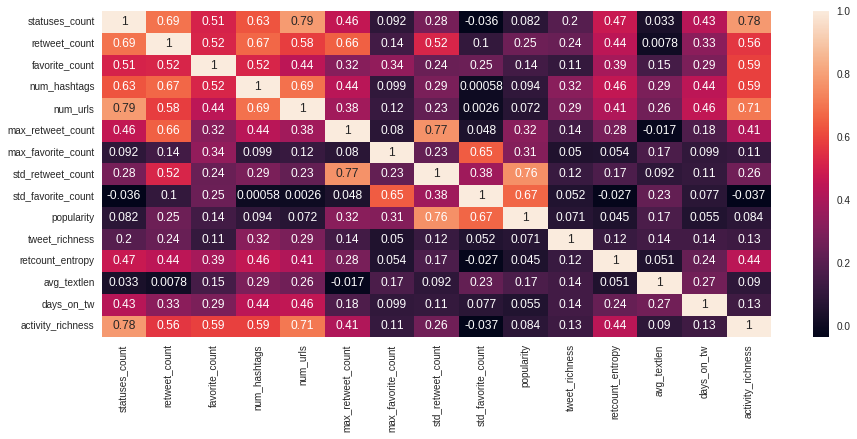

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))         
sns.heatmap(users_profile.corr(), annot=True)
plt.show()

These indicators’ correlations are below the set threshold value (0.8), indicating a weak association.

## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max.
In our project, we performed z-score normalization of the dataset, which standardizes features such that the mean of all of the values is 0 and the standard deviation is 1.

In [ ]:
scaler = StandardScaler()
scaler.fit(users_profile.values)

StandardScaler()

In [ ]:
users_profile.head().values

array([[6.23762500e+03, 1.38813625e+05, 1.03112500e+03, 2.97500000e+02,
        2.45000000e+02, 2.13250000e+04, 3.40000000e+01, 7.23522858e+02,
        1.41947839e+00, 7.93420388e+01, 1.81297388e+00, 6.08042594e+00,
        1.09637321e+02, 3.90000000e+03, 6.08717949e-01],
       [6.23762500e+03, 1.38813625e+05, 9.69000000e+02, 2.97500000e+02,
        2.45000000e+02, 2.96689000e+05, 1.90000000e+01, 1.15082098e+04,
        1.07841900e+00, 5.73720435e+02, 1.22117763e+00, 0.00000000e+00,
        8.50267194e+01, 3.89300000e+03, 5.19136912e-01],
       [6.23762500e+03, 9.23960000e+04, 3.91000000e+02, 7.70000000e+01,
        2.45000000e+02, 1.31210000e+04, 8.00000000e+00, 5.46629170e+02,
        4.90437268e-01, 4.32775187e+01, 1.16977612e+00, 2.37553356e+00,
        8.07803172e+01, 3.88500000e+03, 5.51866152e-01],
       [6.23762500e+03, 1.38813625e+05, 2.09000000e+02, 2.97500000e+02,
        2.45000000e+02, 1.05138000e+05, 7.00000000e+00, 3.35935630e+03,
        3.92886411e-01, 1.57694596e+0

In [ ]:
X = scaler.transform(users_profile.values)

In [ ]:
X[:5]

array([[ 1.87421842e+00,  1.81335330e+00,  2.01878891e+00,
         2.02814771e+00,  1.94677376e+00, -1.58836679e-01,
        -1.48893541e-01, -1.81452454e-01, -1.18609318e-01,
        -1.20992222e-01,  1.00483459e+00,  2.93705988e+00,
         2.37021204e+00,  3.76411345e+00,  1.41521552e-01],
       [ 1.87421842e+00,  1.81335330e+00,  1.85748279e+00,
         2.02814771e+00,  1.94677376e+00,  2.65084441e+00,
        -1.61040201e-01,  1.80143057e+00, -1.21355736e-01,
         1.14738060e-01,  4.89220259e-01, -6.24506907e-01,
         8.87347396e-01,  3.75144203e+00,  1.34581115e-02],
       [ 1.87421842e+00,  9.99600053e-01,  3.56719226e-01,
        -3.18727710e-03,  1.94677376e+00, -2.42546328e-01,
        -1.69947751e-01, -2.13976300e-01, -1.26090524e-01,
        -1.38188563e-01,  4.44435660e-01,  7.66945187e-01,
         6.31488561e-01,  3.73696040e+00,  6.02472445e-02],
       [ 1.87421842e+00,  1.81335330e+00, -1.15839544e-01,
         2.02814771e+00,  1.94677376e+00,  6.96350640

# Methods to estimate the best K

In [ ]:
model = KMeans()
k_range = [10, 20]

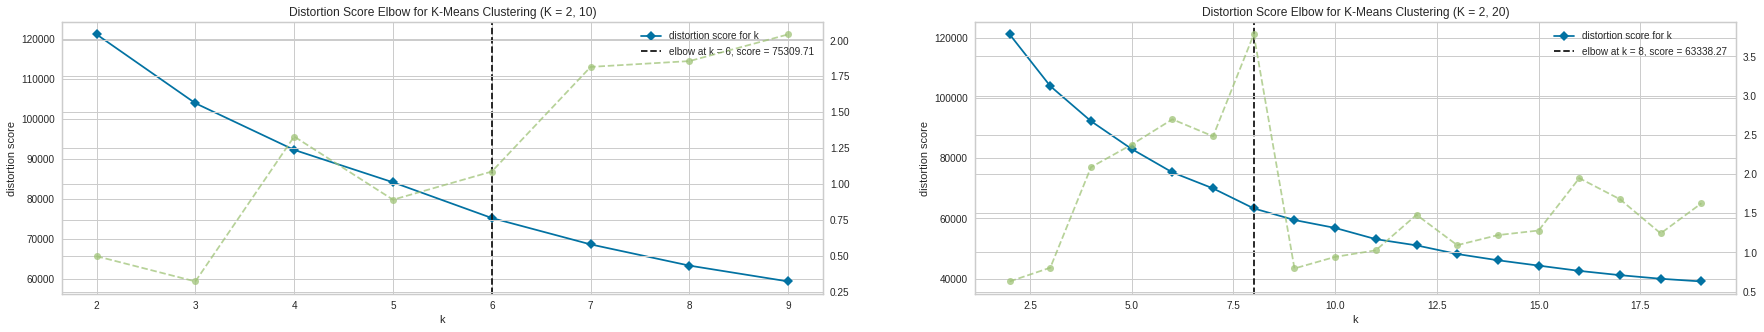

In [ ]:
# Elbow plots
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(30,5))

for i in range(len(k_range)):
    vis = KElbowVisualizer(model, k=(2,k_range[i]), ax=axs[i])   
    vis.fit(X)  
    axs[i].set_title('Distortion Score Elbow for K-Means Clustering (K = ' + str(2) + ', ' + str(k_range[i]) + ')' )
    axs[i].set_ylabel('distortion score')
    axs[i].set_xlabel('k')
    axs[i].legend(['distortion score for k','elbow at k = ' + str(vis.elbow_value_) + ', score = ' + '{:.2f}'.format(vis.elbow_score_)])
plt.show()

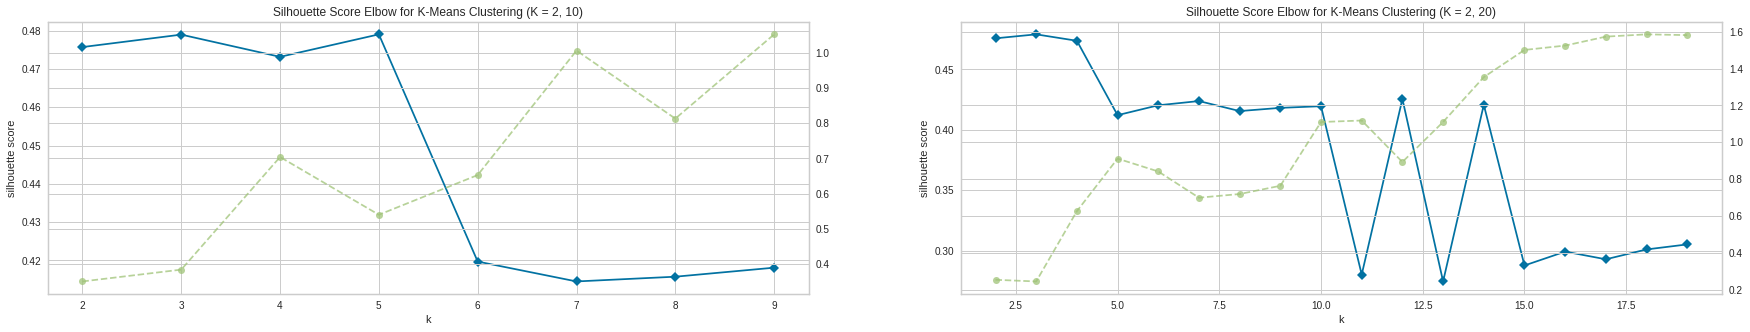

In [ ]:
# Silhouette plots
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(30,5))

for i in range(len(k_range)):
    vis = KElbowVisualizer(model, k=(2,k_range[i]), ax=axs[i], metric='silhouette', locate_elbow=False)   
    vis.fit(X)  
    axs[i].set_title('Silhouette Score Elbow for K-Means Clustering (K = ' + str(2) + ', ' + str(k_range[i]) + ')' )
    axs[i].set_ylabel('silhouette score')
    axs[i].set_xlabel('k')
plt.show()

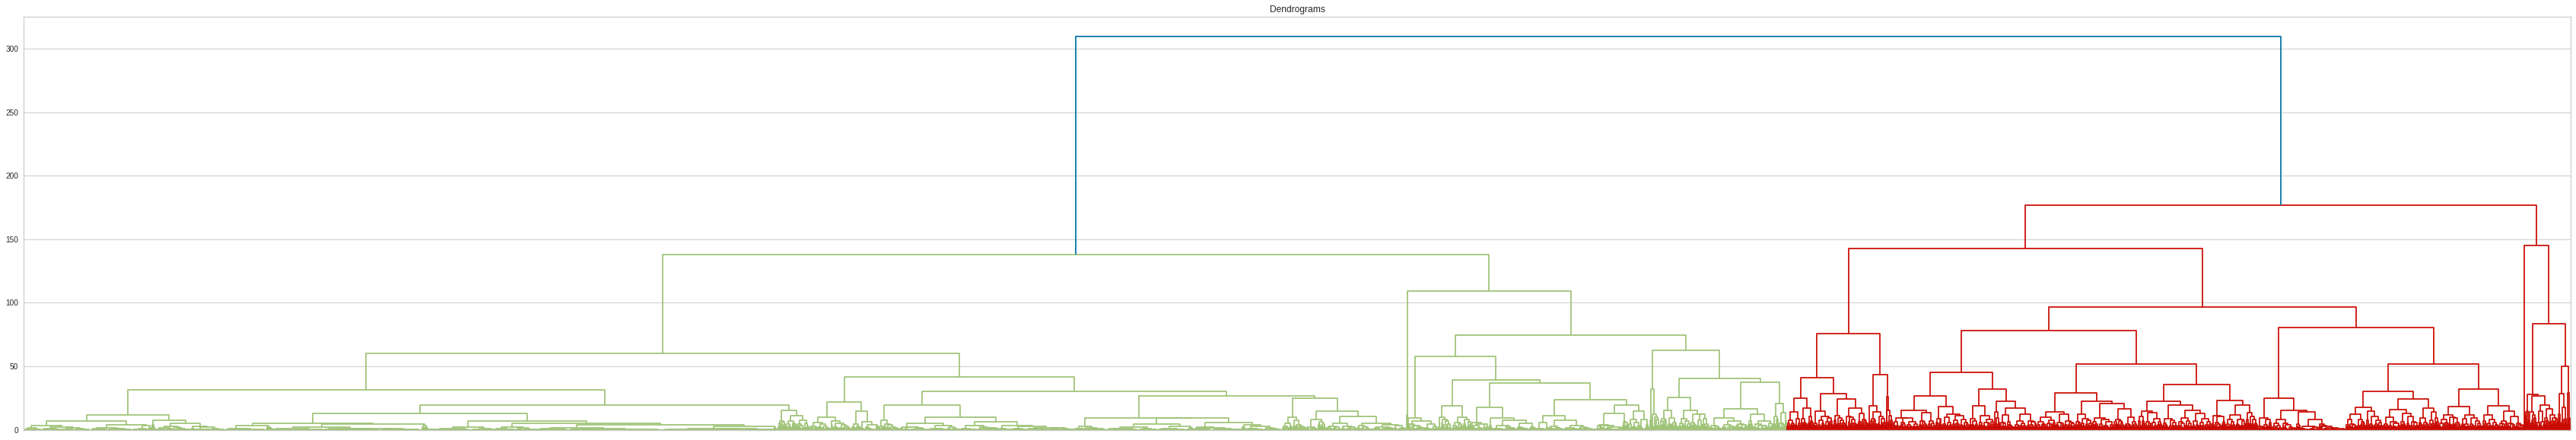

In [ ]:
# Dendogram from Hierarchical Clustering    (extra method to select potential number of clusters)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(60, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'), no_labels=True)

In [ ]:
potK = [2, 3, 6, 8]  # potentials number of clusters

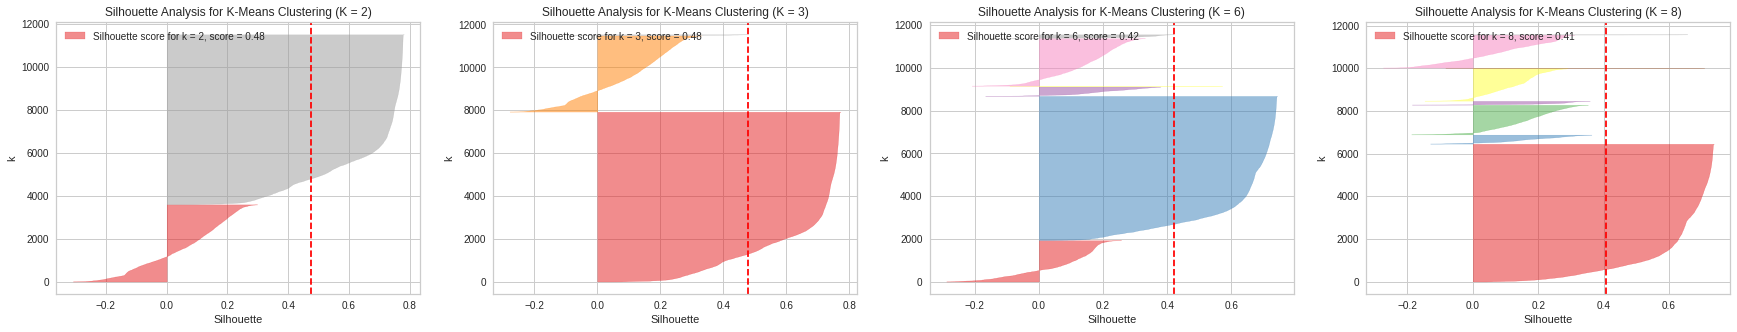

In [ ]:
# Silhouette Visualizer
f, axs = plt.subplots(nrows=1, ncols=len(potK), figsize=(30,5))

for i in range(len(potK)):
    sil_vis = SilhouetteVisualizer(KMeans(potK[i]), ax=axs[i])
    sil_vis.fit(X)    
    axs[i].set_title('Silhouette Analysis for K-Means Clustering (K = ' + str(potK[i]) + ')' )
    axs[i].set_ylabel('k')
    axs[i].set_xlabel('Silhouette')
    axs[i].legend(['Silhouette score for k = ' + str(potK[i]) + ', score = ' + '{:.2f}'.format(sil_vis.silhouette_score_)])
plt.show()

In [ ]:
centers = []
labels = []
inertia = []
for k in potK:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100) 
    kmeans.fit(X) 
    centers.append(scaler.inverse_transform(kmeans.cluster_centers_)) 
    labels.append(kmeans.labels_) 
    inertia.append(kmeans.inertia_) # sse

sse=[]
dav=[]
sil=[]
cal=[]
# scores for each selected K
for i in range(len(potK)):
    sse.append(inertia[i])
    dav.append(davies_bouldin_score(X, labels[i]))
    sil.append(silhouette_score(X, labels[i]))
    cal.append(calinski_harabasz_score(X, labels[i]))
    print("K=", potK[i], " SSE=", sse[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])
    

K= 2  SSE= 121197.8993942737  Silhouette= 0.47571005855821363  Davies_Bouldin= 1.241440001262266  Calinski_Harabasz= 4881.792962830339
K= 3  SSE= 103989.85416171644  Silhouette= 0.479000697121195  Davies_Bouldin= 1.045078518969557  Calinski_Harabasz= 3796.4753111469204
K= 6  SSE= 75286.87924393204  Silhouette= 0.4196994112415385  Davies_Bouldin= 1.3221719358754258  Calinski_Harabasz= 2974.0305328142554
K= 8  SSE= 63338.2630994888  Silhouette= 0.4087454281311154  Davies_Bouldin= 1.3270522802319902  Calinski_Harabasz= 2834.532117206171


The K-Means is a clustering algorithm which groups data based on cluster center point
(centroid) closest to data. The purpose of K-Means is grouping data maximizing data similarity in
one cluster and minimizing data similarity between clusters. 
In this context, Sum of Square Error (SSE) measures the distance between data and their cluster centers (centroids). So, the lower the SSE, the more cohesion is in the clusters. At the same time, a lower value of SSE is expected as k increases. [--> K=8]

The silhouette score falls within the range -1 +1. A silhouette score of 1 means that the clusters are very dense and nicely separated. A score of 0 means that clusters are overlapping. A score less than 0 means that data belonging to clusters may be wrong / incorrect. [--> K=3]

The Davies-Bouldin score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering. [--> K=3]

The Calinski-Harabasz (CH) Index (also known as Variance ratio criterion) is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Here cohesion is estimated based on the distances from the data points in a cluster to its cluster centroid and separation is based on the distance of the cluster centroids from the global centroid. Higher value of CH index means the clusters are dense and well separated. [--> K=2]

# K-Means

## The Algorithm in a Nutshell

**Objective:** Clusters the data into $k$ groups.
* **Init step:** Select k points at random as cluster centers.
* **Assignment step:** Assign each instance to the cluster with the closest mean according to the distance function.
* **Update step**: Calculate the new means to be the centroids of the instances in the new clusters.
* ***Repeat*** steps 2 and 3 until the assignment no longer change.

There is no guarantee that the optimum is found using this algorithm.

## K-Means Problems

* Initial Centroids
* Number of clusters

## K-Means in Python  ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#k-means))

Parameters:
* **n_clusters** (default 8): The number of clusters
* **n_init** (default 10): Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter** (default 300): Maximum number of iterations of the k-means algorithm for a single run.

Output:
* **labels_**: Labels of each point
* **cluster\_centers_**: Coordinates of cluster centers
* **inertia_**: Sum of squared distances of samples to their closest cluster center.

For this analysis, it was decided to analyse all K values among those who had the best scores for the evaluation metrics K={2,3,4,5,6,7,8}.

In [ ]:
kmeans = []

kmeans2 = KMeans(n_clusters=2, n_init=10, max_iter=100)
kmeans2.fit(X)
kmeans.append(kmeans2)

kmeans3 = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans3.fit(X)
kmeans.append(kmeans3)

kmeans4 = KMeans(n_clusters=4, n_init=10, max_iter=100)
kmeans4.fit(X)
kmeans.append(kmeans4)

kmeans5 = KMeans(n_clusters=5, n_init=10, max_iter=100)
kmeans5.fit(X)
kmeans.append(kmeans5)

kmeans6 = KMeans(n_clusters=6, n_init=10, max_iter=100)
kmeans6.fit(X)
kmeans.append(kmeans6)

kmeans7 = KMeans(n_clusters=7, n_init=10, max_iter=100)
kmeans7.fit(X)
kmeans.append(kmeans7)

kmeans8 = KMeans(n_clusters=8, n_init=10, max_iter=100)
kmeans8.fit(X)
kmeans.append(kmeans8)

Labels

In [ ]:
for i in range(len(kmeans)):
  print(kmeans[i].labels_[:5])

[1 1 1 1 1]
[1 1 1 1 1]
[2 0 2 2 2]
[1 3 1 1 1]
[1 1 1 1 1]
[6 6 6 6 6]
[6 0 0 0 0]


Observing the size of each cluster

In [ ]:
for i in range(len(kmeans)):
  print(np.unique(kmeans[i].labels_, return_counts=True))

(array([0, 1], dtype=int32), array([7916, 3592]))
(array([0, 1, 2], dtype=int32), array([7916, 3549,   43]))
(array([0, 1, 2, 3], dtype=int32), array([ 497, 7646, 3325,   40]))
(array([0, 1, 2, 3, 4], dtype=int32), array([7619, 3222,   24,  469,  174]))
(array([0, 1, 2, 3, 4, 5], dtype=int32), array([6745, 2215, 1927,  427,   24,  170]))
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([1526, 6444,  421,   24,  173, 1435, 1485]))
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([1154, 6682,   12,  177, 1775,  416, 1280,   12]))


In [ ]:
for i in range(len(kmeans)):
  hist, bins = np.histogram(kmeans[i].labels_, bins=range(0, len(set(kmeans[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

{0: 7916, 1: 3592}
{0: 7916, 1: 3549, 2: 43}
{0: 497, 1: 7646, 2: 3325, 3: 40}
{0: 7619, 1: 3222, 2: 24, 3: 469, 4: 174}
{0: 6745, 1: 2215, 2: 1927, 3: 427, 4: 24, 5: 170}
{0: 1526, 1: 6444, 2: 421, 3: 24, 4: 173, 5: 1435, 6: 1485}
{0: 1154, 1: 6682, 2: 12, 3: 177, 4: 1775, 5: 416, 6: 1280, 7: 12}


### Centers

In [ ]:
for i in range(len(kmeans)):
  print(kmeans[i].cluster_centers_)
  print("------------------------")

[[-0.58827536 -0.52160515 -0.36647809 -0.48948305 -0.55197064 -0.34965309
  -0.12468644 -0.26399892 -0.05448613 -0.12337478 -0.19351417 -0.3355902
  -0.0955287  -0.29215379 -0.50892077]
 [ 1.29748308  1.1504372   0.80829345  1.07958963  1.21741046  0.77118474
   0.27500479  0.58226838  0.12017304  0.27211184  0.42680925  0.74016803
   0.21069534  0.64436593  1.1224609 ]]
------------------------
[[-0.58879451 -0.52071286 -0.36503793 -0.49077433 -0.5532803  -0.34927782
  -0.12046183 -0.26350097 -0.05311696 -0.12319485 -0.19343328 -0.33707632
  -0.09565283 -0.29202105 -0.50987455]
 [ 1.31972795  1.13947276  0.79122999  1.0931796   1.23335192  0.76586909
   0.1772701   0.50534454 -0.04445344  0.14959921  0.42164436  0.75626559
   0.16697581  0.63768447  1.14417797]
 [-0.53063104  1.8133533   1.89686017  0.12267986  0.06048633  1.08869269
   7.54521476  6.80013858 13.44742078 10.33215835  0.80934973 -0.36489362
   3.82768921  1.12782531 -0.57024814]]
------------------------
[[ 1.21642064e

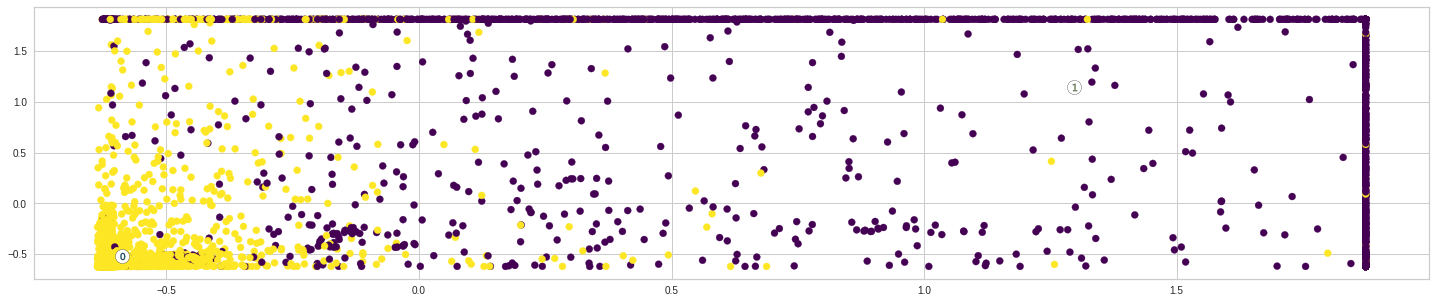

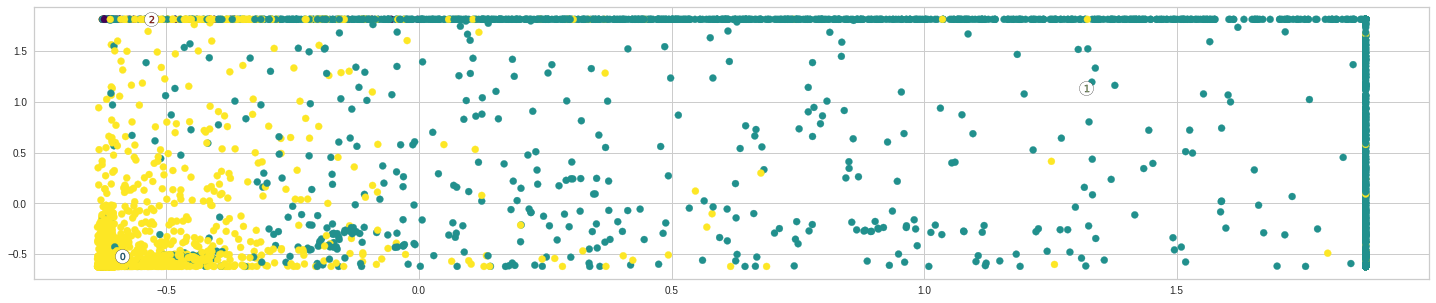

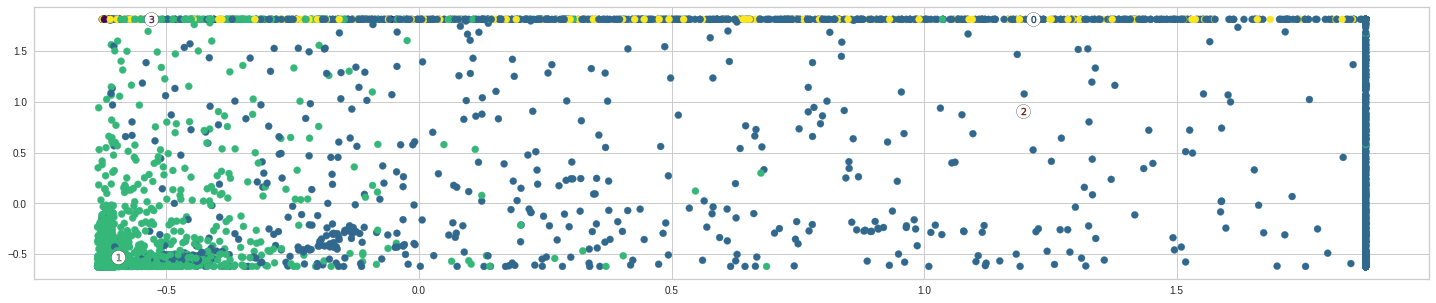

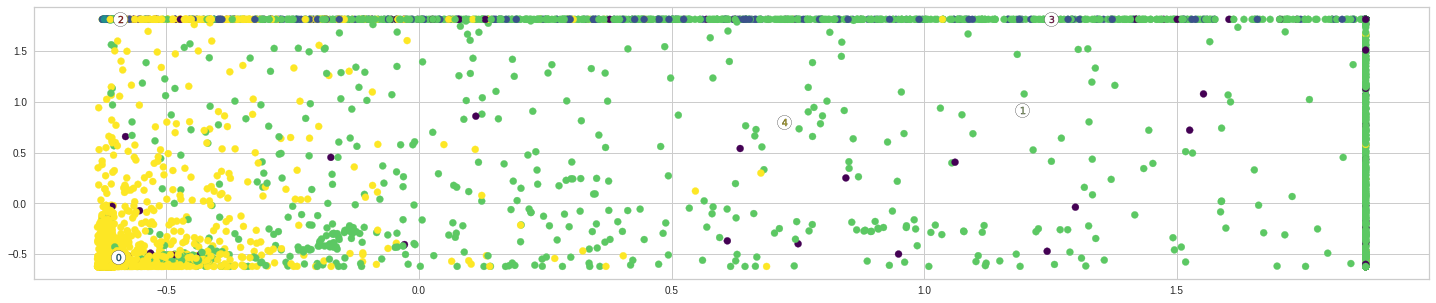

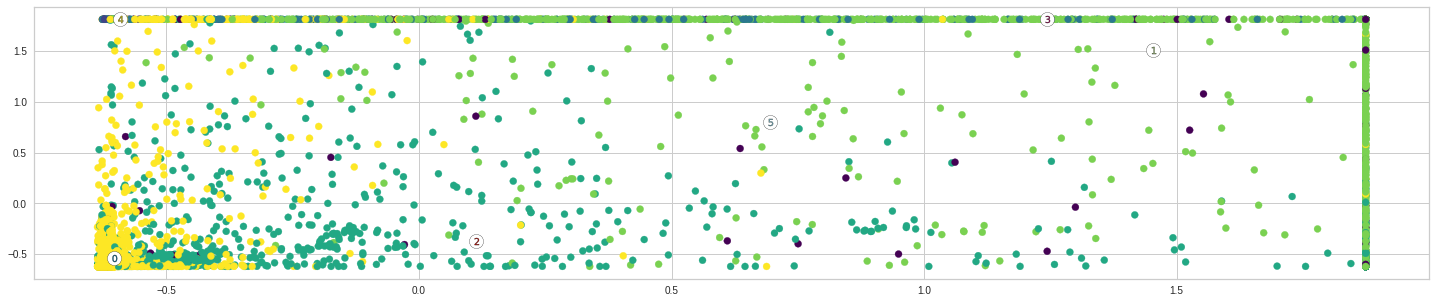

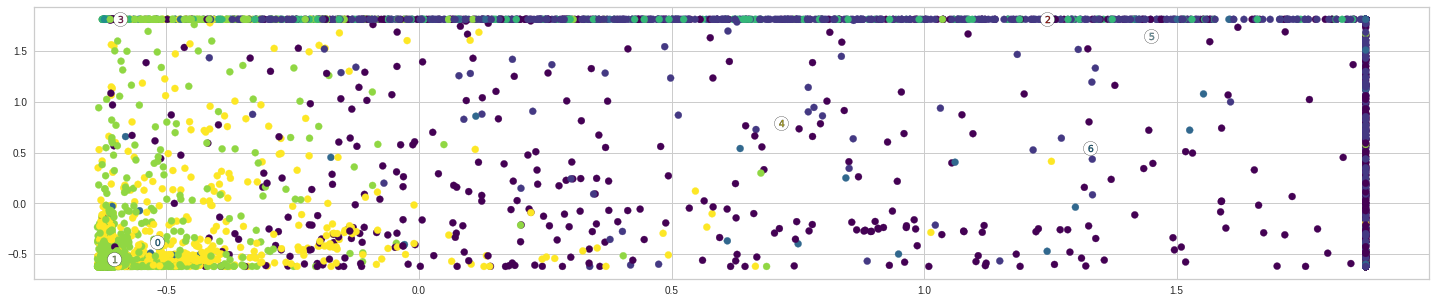

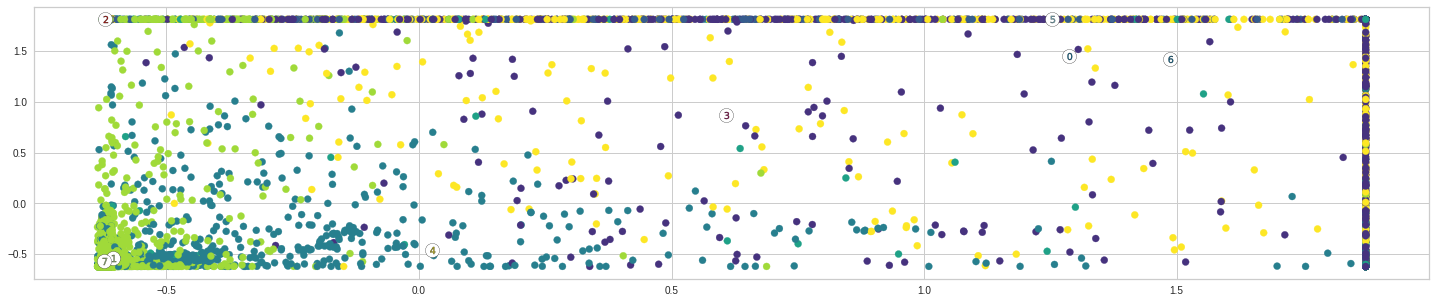

In [ ]:
for i in range(len(kmeans)):  
  plt.figure(figsize=(25,5))
  plt.scatter(X[:,0],X[:,1],cmap="viridis_r", c=kmeans[i].labels_)
  plt.scatter(kmeans[i].cluster_centers_[:, 0], kmeans[i].cluster_centers_[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
  for i, c in enumerate(kmeans[i].cluster_centers_):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
  plt.show()

### Visualization of clusters centers by means of parallel coordinates

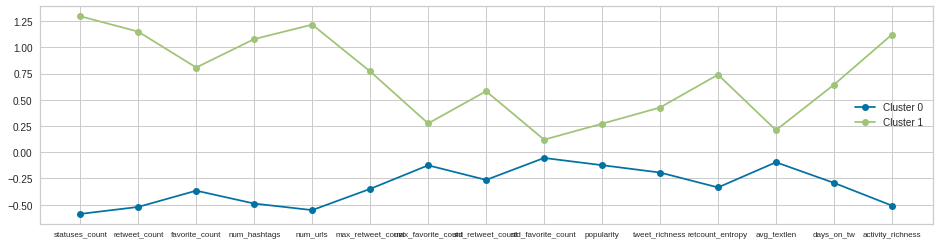

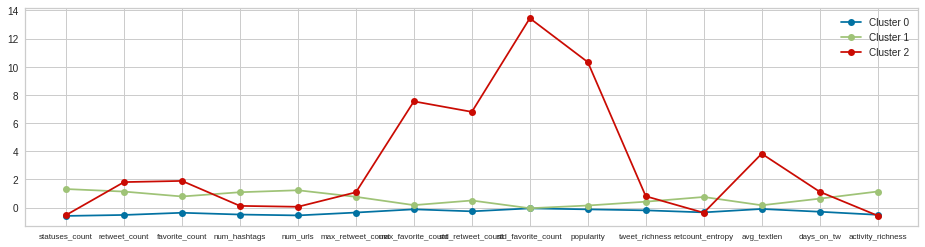

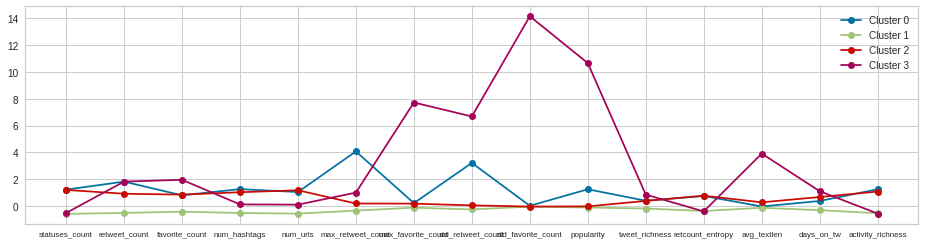

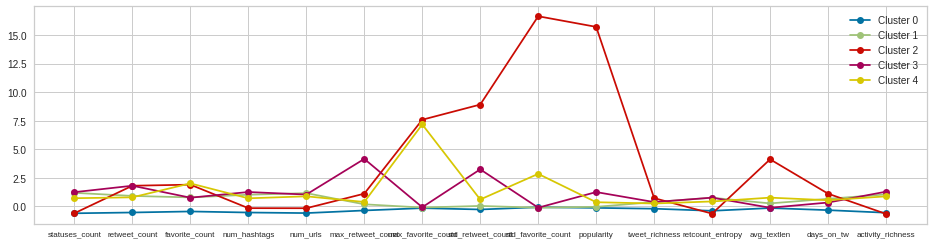

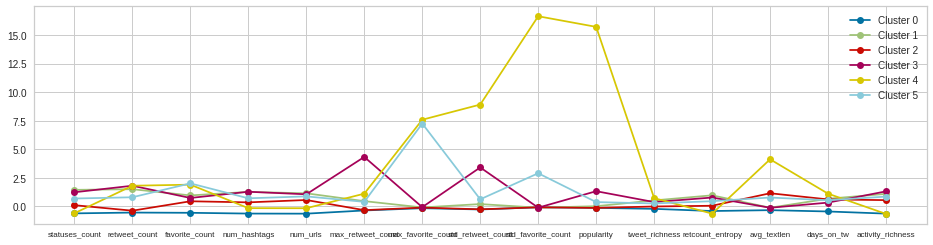

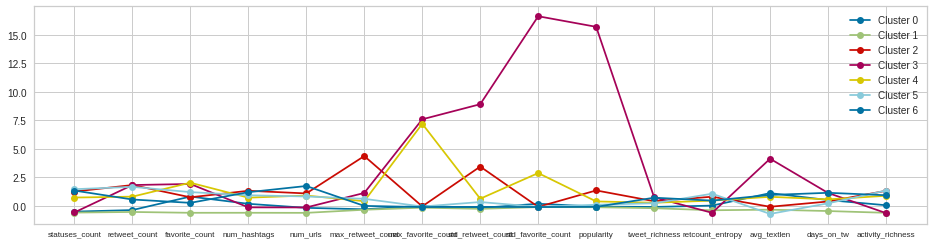

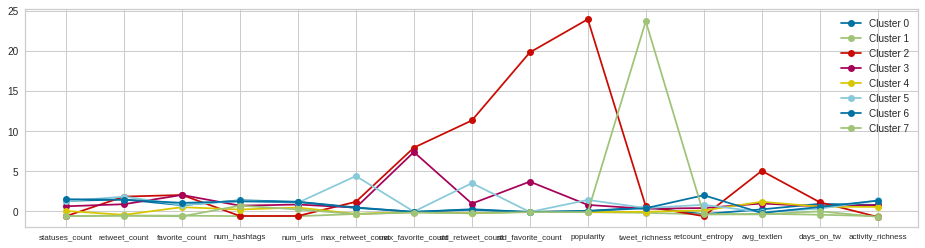

In [ ]:
for ii in range(len(kmeans)):
  plt.figure(figsize=(16, 4))
  for i in range(0, len(kmeans[ii].cluster_centers_)):
      plt.plot(kmeans[ii].cluster_centers_[i], marker='o', label='Cluster %s' % i)
  plt.tick_params(axis='both', which='major', labelsize=10)
  plt.xticks(range(0, len(users_profile.columns)), users_profile.columns, fontsize=8)
  plt.legend(fontsize=10)
  plt.show()

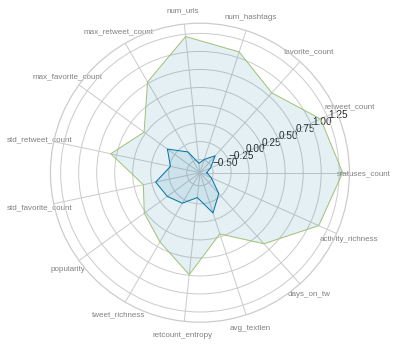

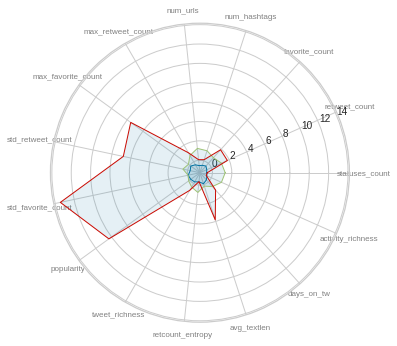

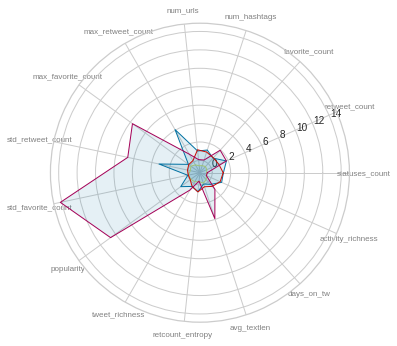

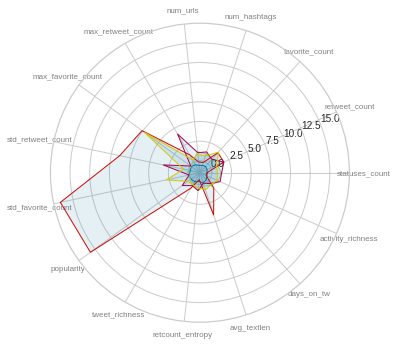

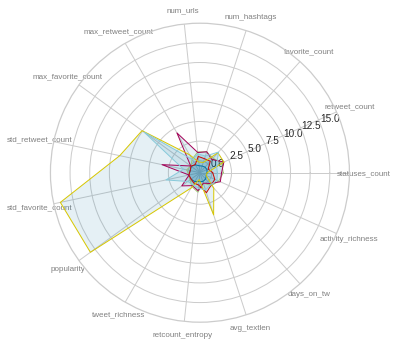

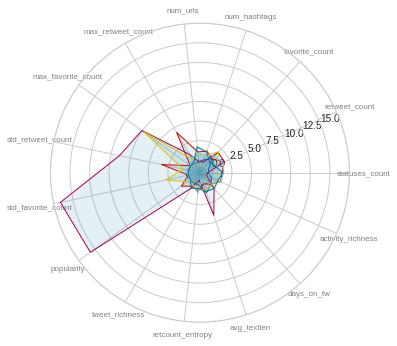

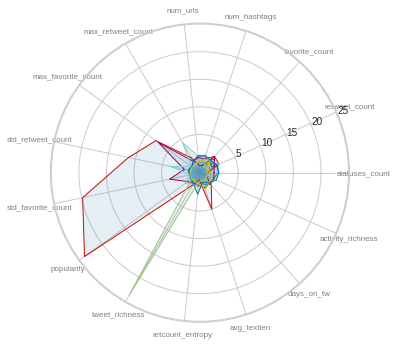

In [ ]:
for ii in range(len(kmeans)):
  # number of variable
  N = len(users_profile.columns)
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  for i in range(0, len(kmeans[ii].cluster_centers_)):
      angles = [n / float(N) * 2 * pi for n in range(N)]
      values = kmeans[ii].cluster_centers_[i].tolist()
      values += values[:1]
      angles += angles[:1]
  # Initialise the spider plot
      ax = plt.subplot(polar=True)
  # Draw one axe per variable + add labels labels yet
      plt.xticks(angles[:-1], users_profile.columns, color='grey', size=8) 
  # Plot data
      ax.plot(angles, values, linewidth=1, linestyle='solid')
  # Fill area
      ax.fill(angles, values, 'b', alpha=0.1)
  plt.show()

## Clusters characterization with respect to categorical features

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_noout.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

user_id                  name lang  bot      user_created_at  \
0   678033          Heather Gold   en    0  2012-01-24 01:57:38   
1   722623          Buzz Jackson   en    0  2012-01-31 00:54:34   
2   755116                    呉⚛   en    0  2012-02-08 05:25:49   
3   755746  Sarah Friedlander G.   en    0  2012-02-09 05:21:24   
4   785080                   W H   en    0  2012-02-23 01:08:16   

   statuses_count  retweet_count  reply_count  favorite_count  num_hashtags  \
0        6237.625     138813.625          0.0        1031.125         297.5   
1        6237.625     138813.625          0.0         969.000         297.5   
2        6237.625      92396.000          0.0         391.000          77.0   
3        6237.625     138813.625          0.0         209.000         297.5   
4        6237.625     138486.000          0.0        1031.125         185.0   

   ...  hour_entropy  favcount_entropy  retcount_entropy  repcount_entropy  \
0  ...           0.0          8.831943          6.080426               0.0   
1  ...           0.0          0.000000          0.000000               0.0   
2  ...           0.0          3.921117          2.375534               0.0   
3  ...           0.0          0.000000          0.000000               0.0   
4  ...           0.0          8.277790          2.354578               0.0   

   has_entropy  url_entropy  men_entropy  avg_textlen  days_on_tw  \
0     9.183814     9.578214    10.607494   109.637321        3900   
1     0.000000     0.000000     0.000000    85.026719        3893   
2     4.836434     5.114369     6.387527    80.780317        3885   
3     0.000000     0.000000     0.000000    84.281111        3884   
4     8.421512     8.222893     9.556485    95.166473        3870   

   activity_richness  
0           0.608718  
1           0.519137  
2           0.551866  
3           0.519310  
4           0.887855  

[5 rows x 33 columns]

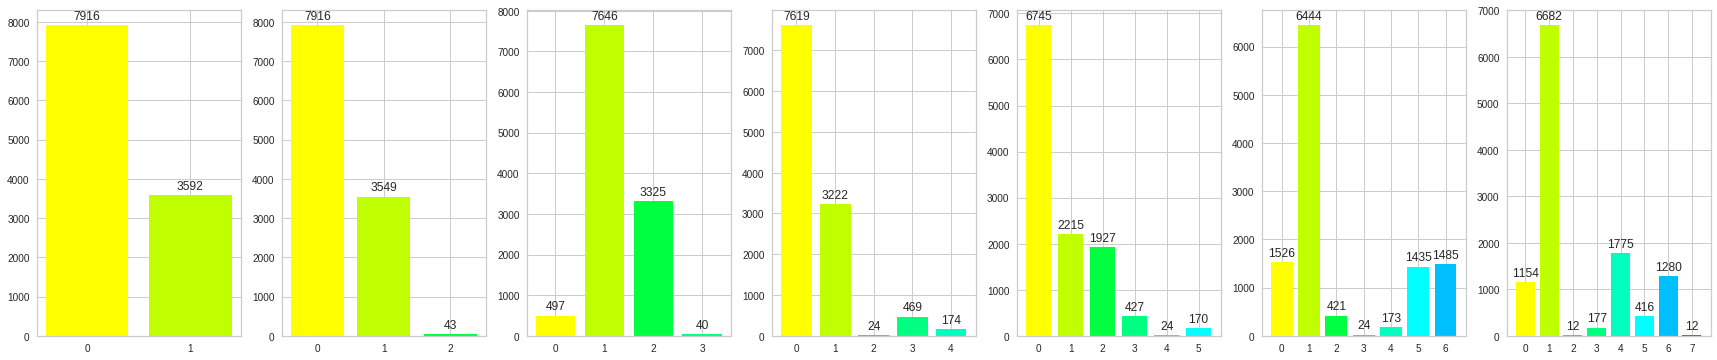

In [ ]:
fig, ax = plt.subplots(ncols=len(kmeans), figsize=(30,6))
for i in range(len(kmeans)):
  hist, bins = np.histogram(kmeans[i].labels_, bins=range(0, len(set(kmeans[i].labels_)) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

The previous plot shows the clusters dimension for each K: we can observe that a cluster always seems to include around 7000 people, independently of the K parameter. According to this phenomenon, the least populous cluster in the K=2 scenario is the one that is involved with subsequent clustering.

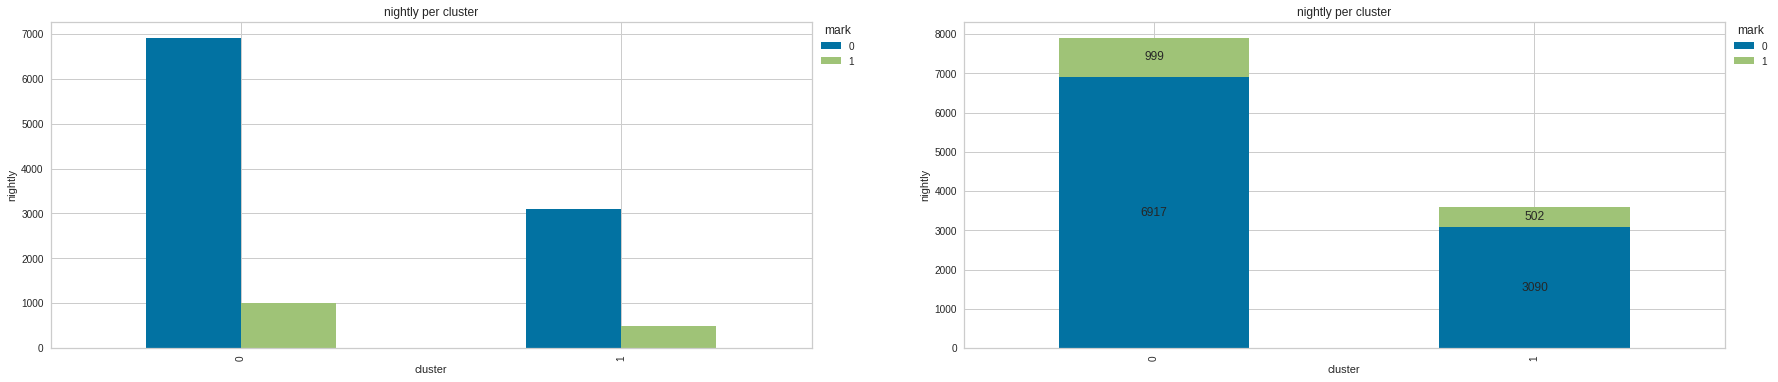

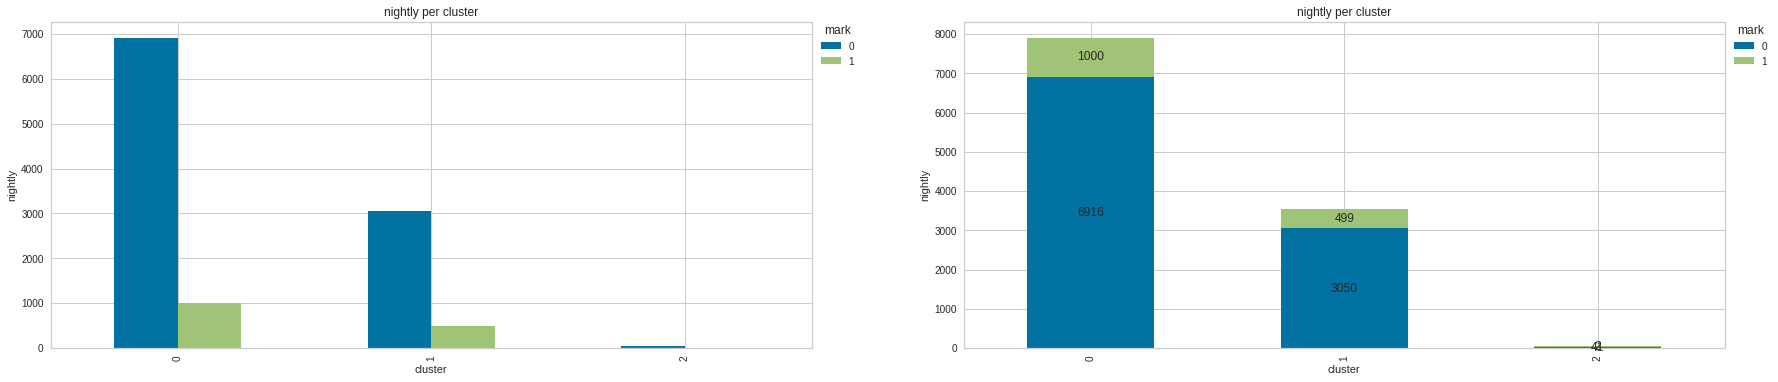

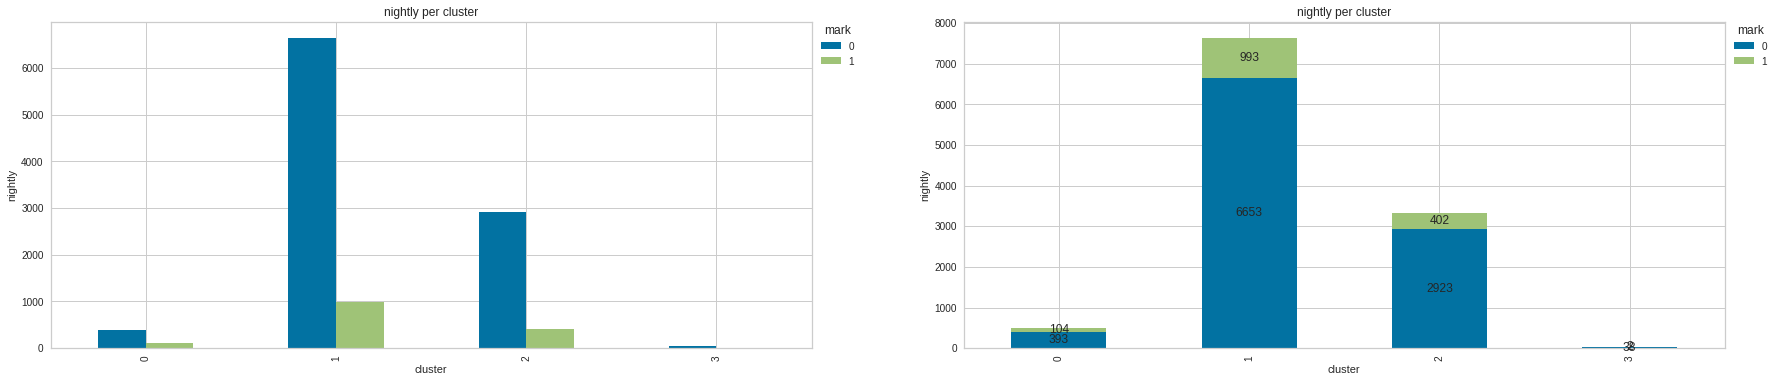

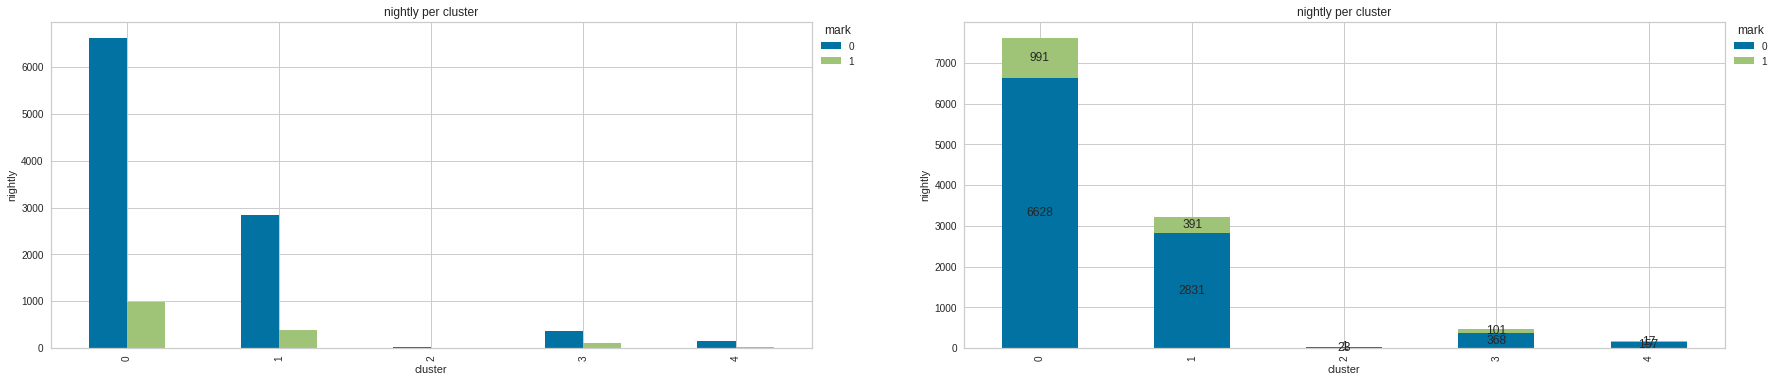

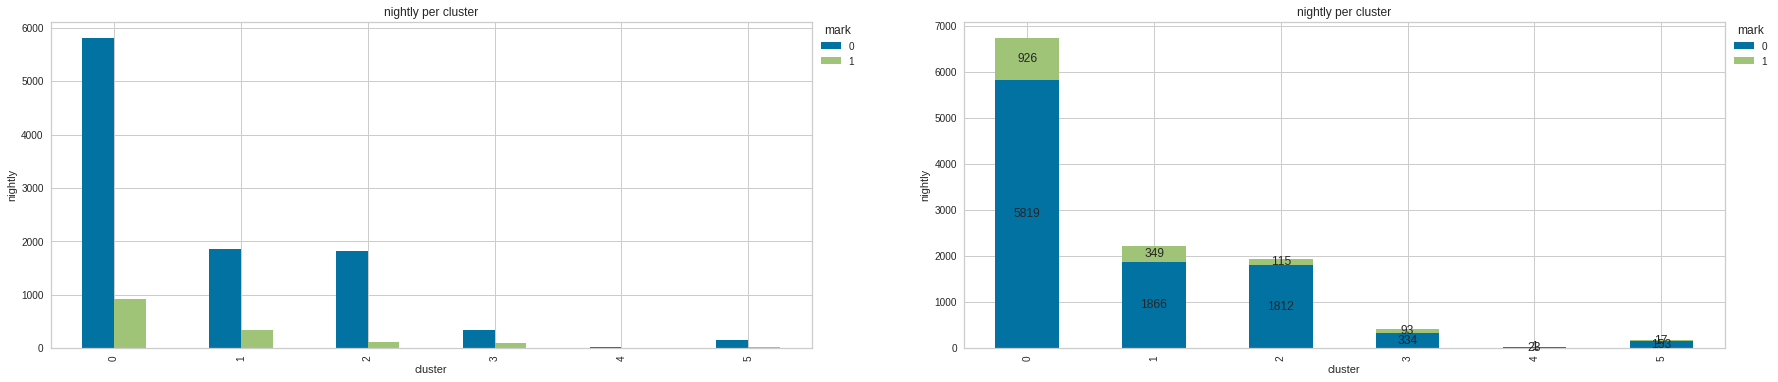

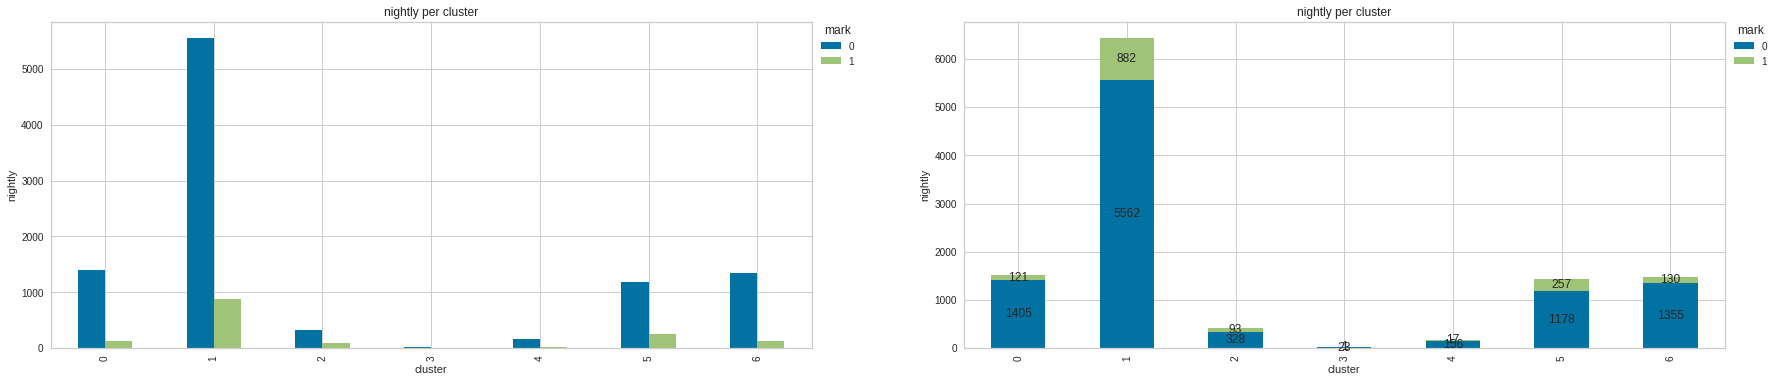

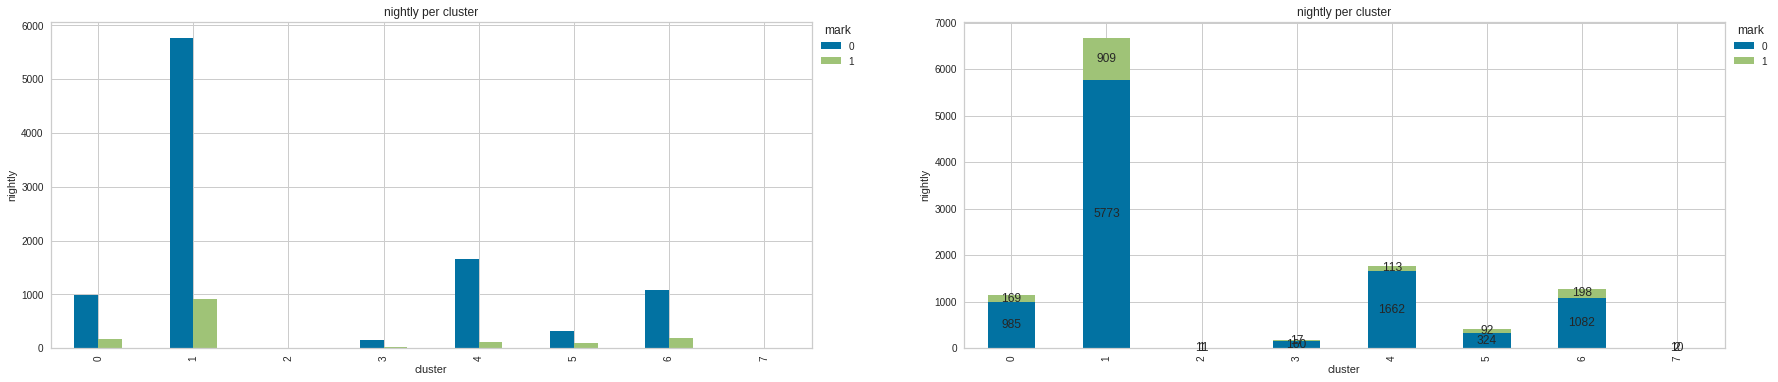

In [ ]:
for i in range(len(kmeans)):
  nightly_ct = pd.crosstab(kmeans[i].labels_,users_profile_all['nightly'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('nightly')

  ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('nightly')

  plt.show()

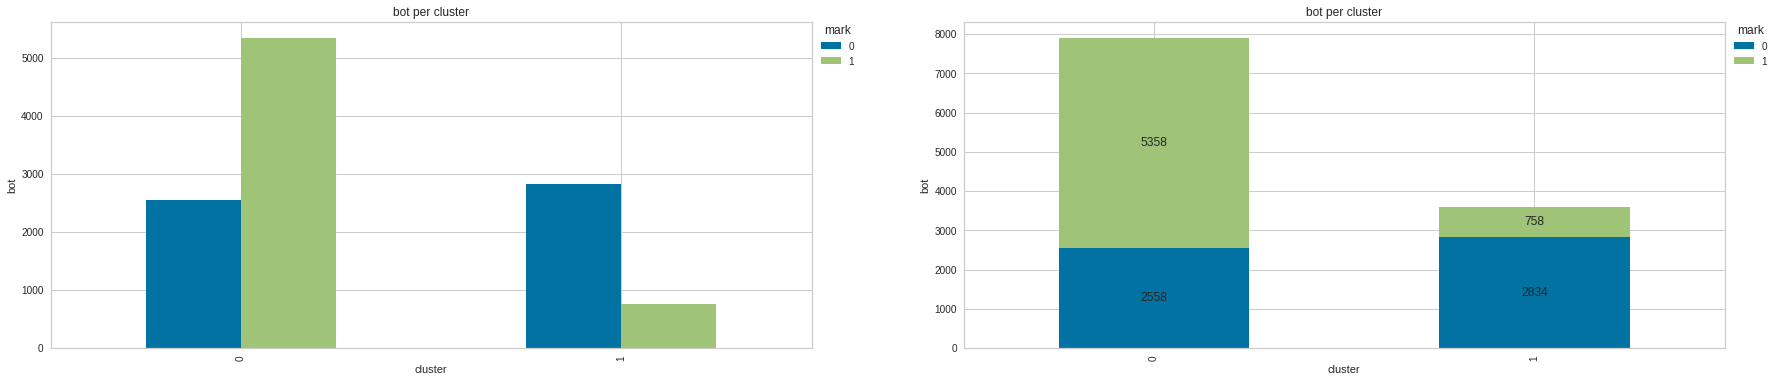

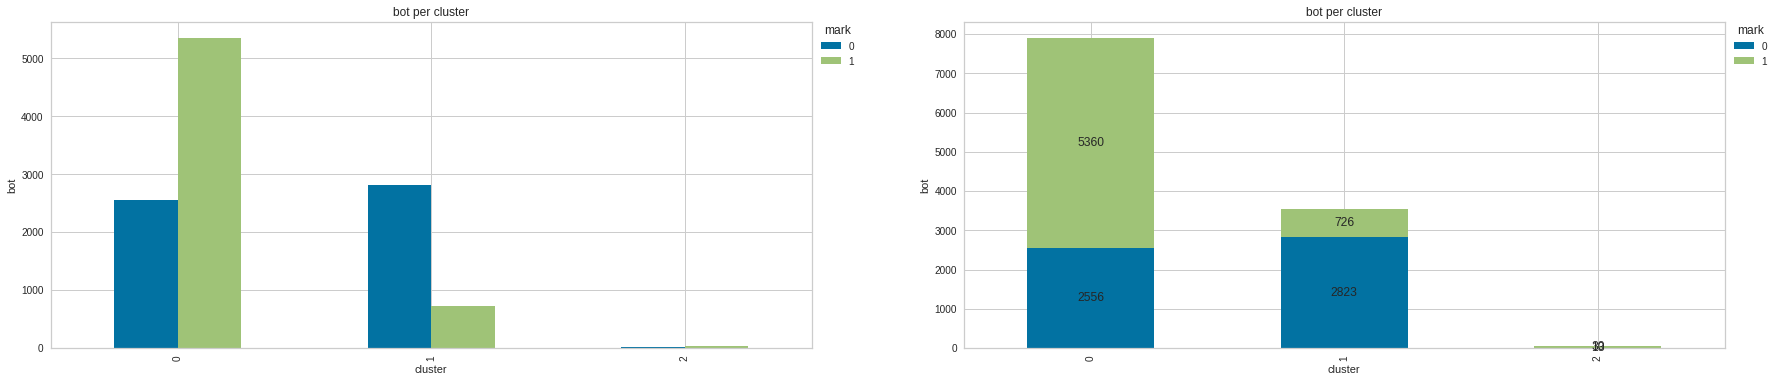

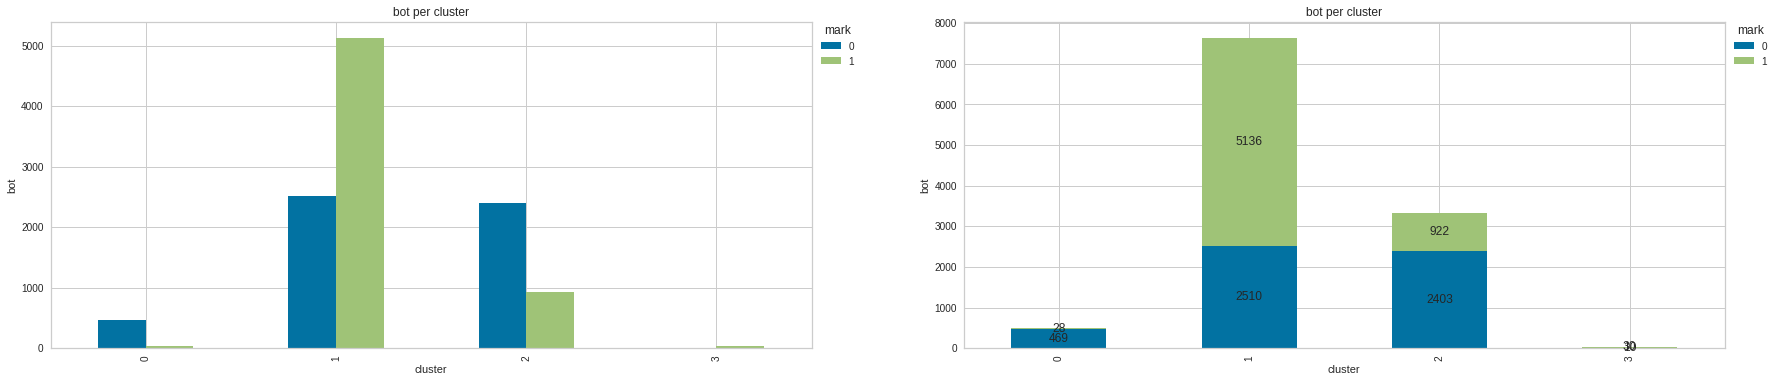

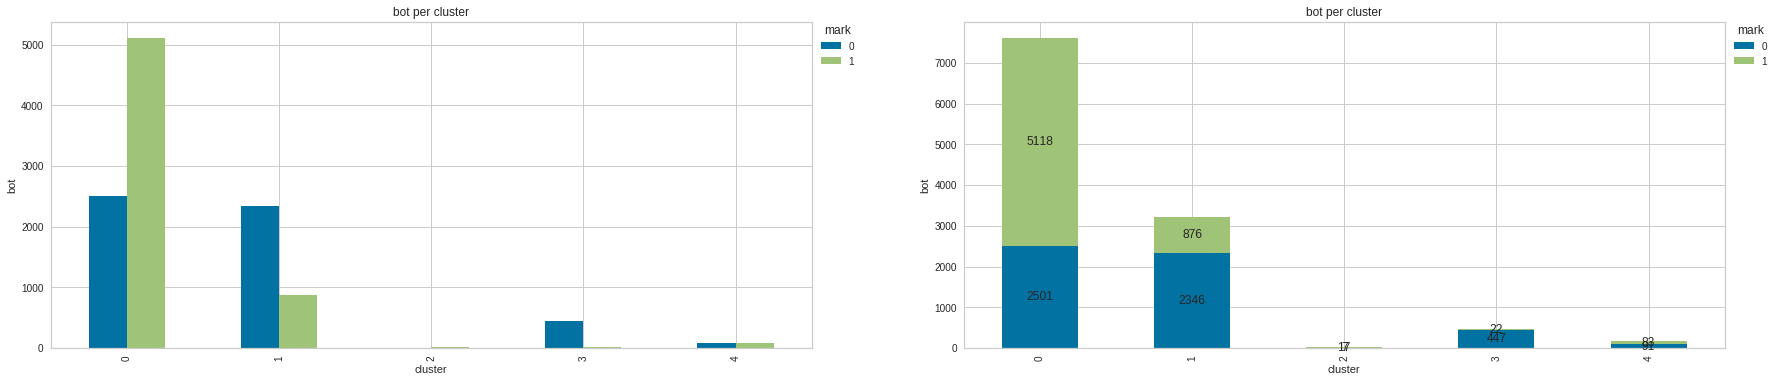

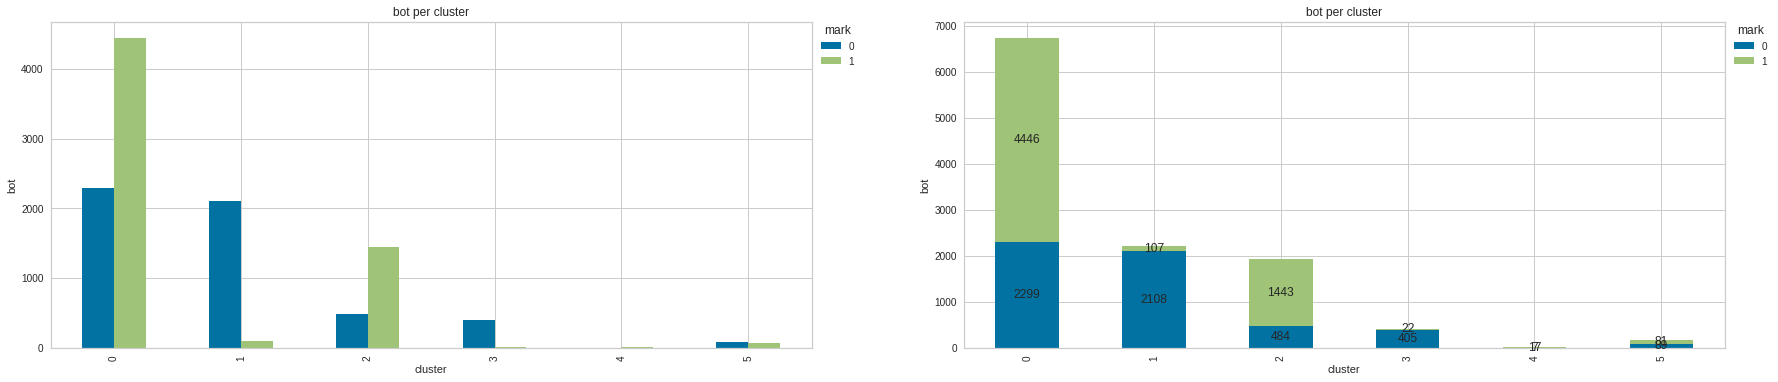

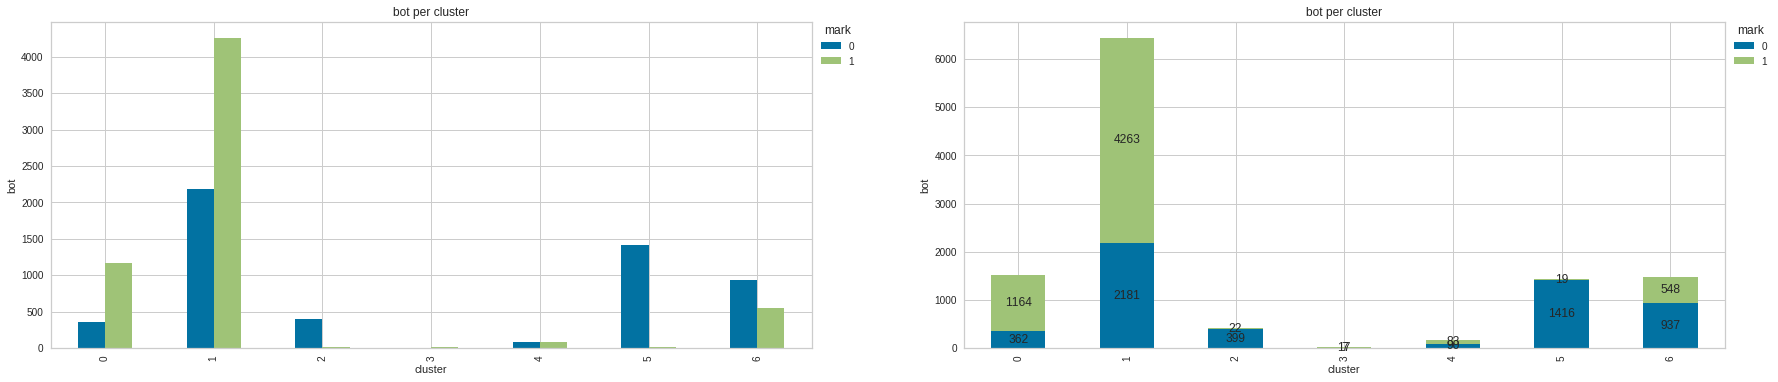

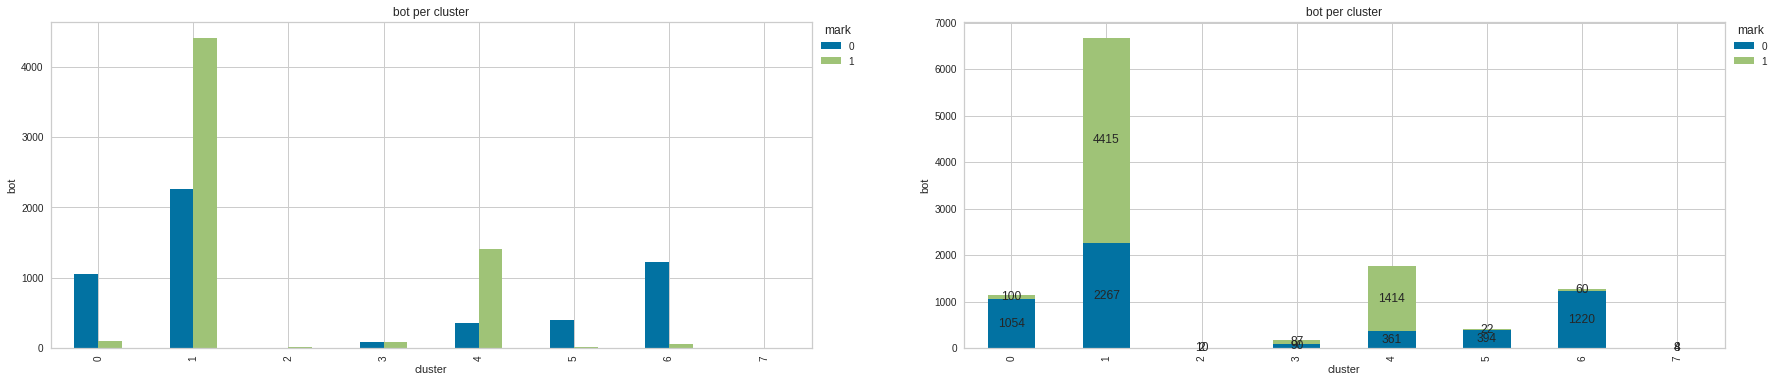

In [ ]:
for i in range(len(kmeans)):
  bot_ct = pd.crosstab(kmeans[i].labels_,users_profile_all['bot'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('bot')

  ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('bot')

  plt.show()

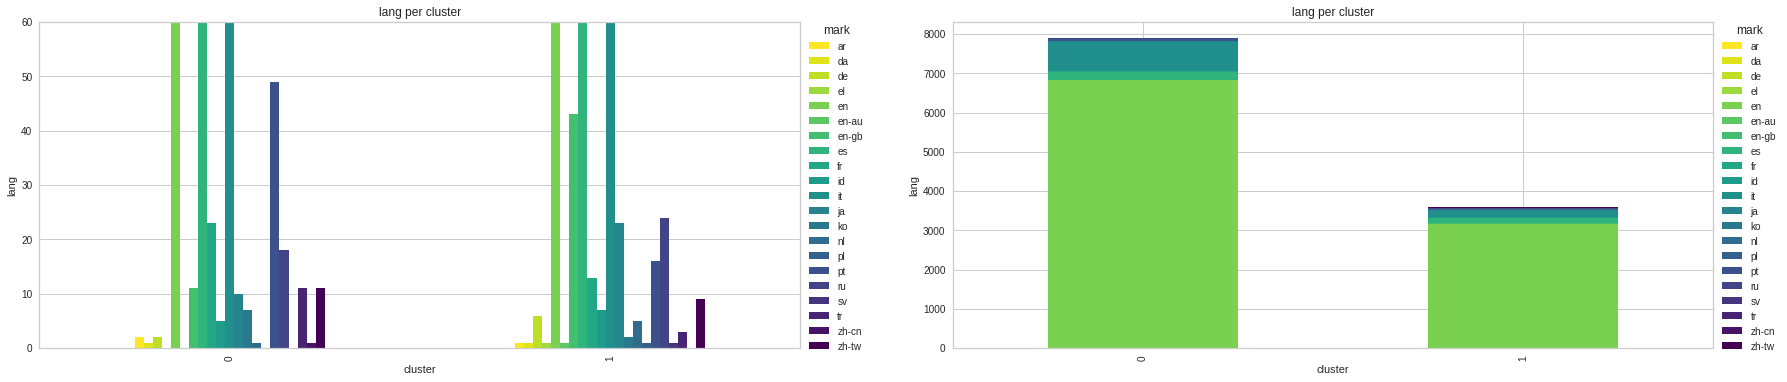

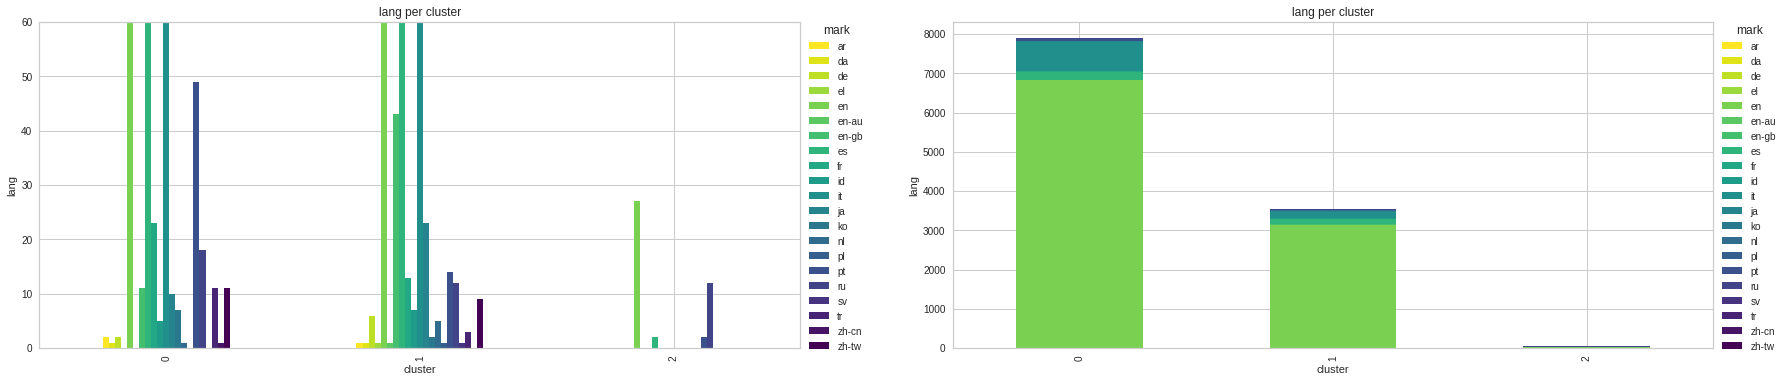

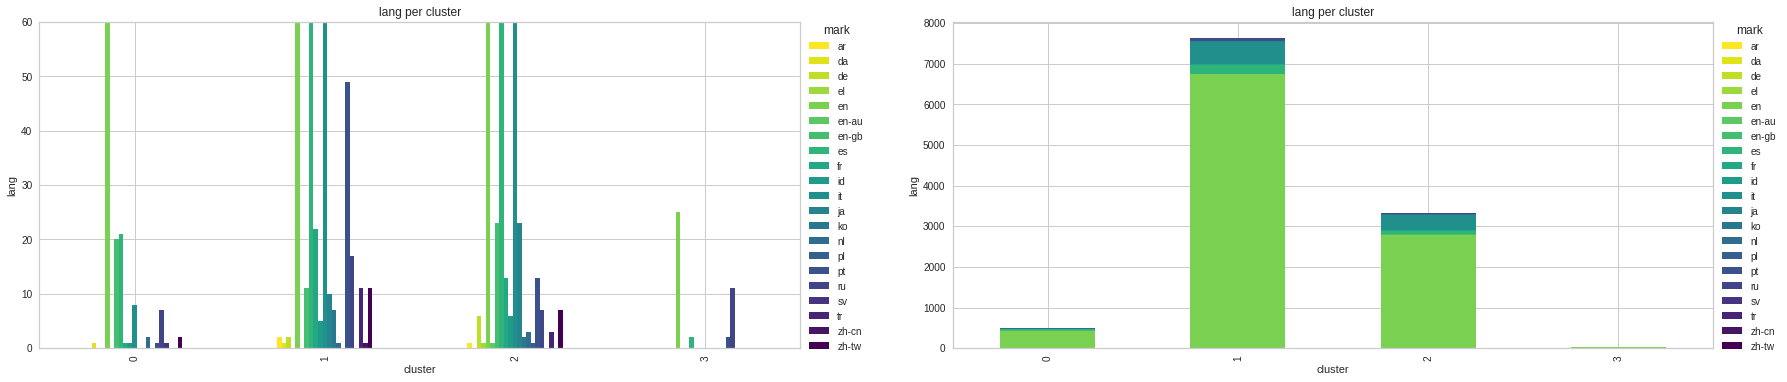

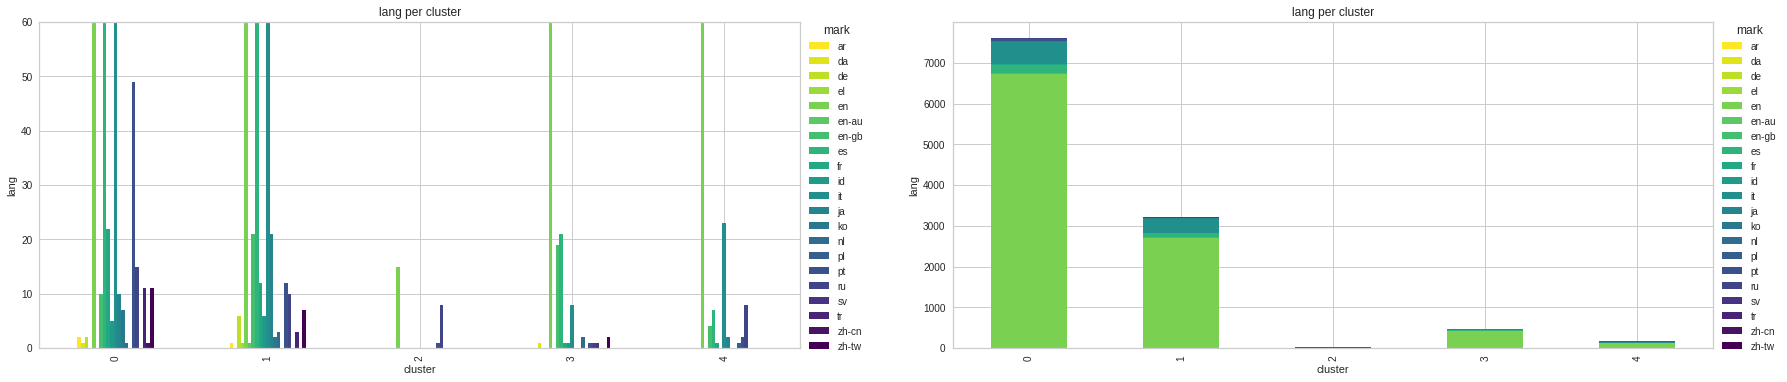

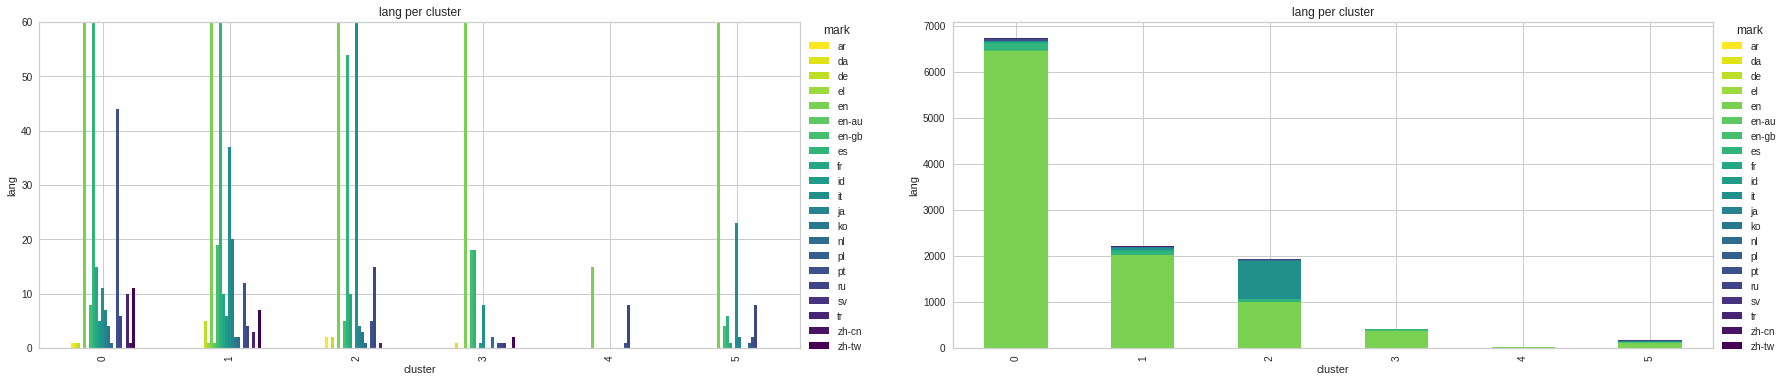

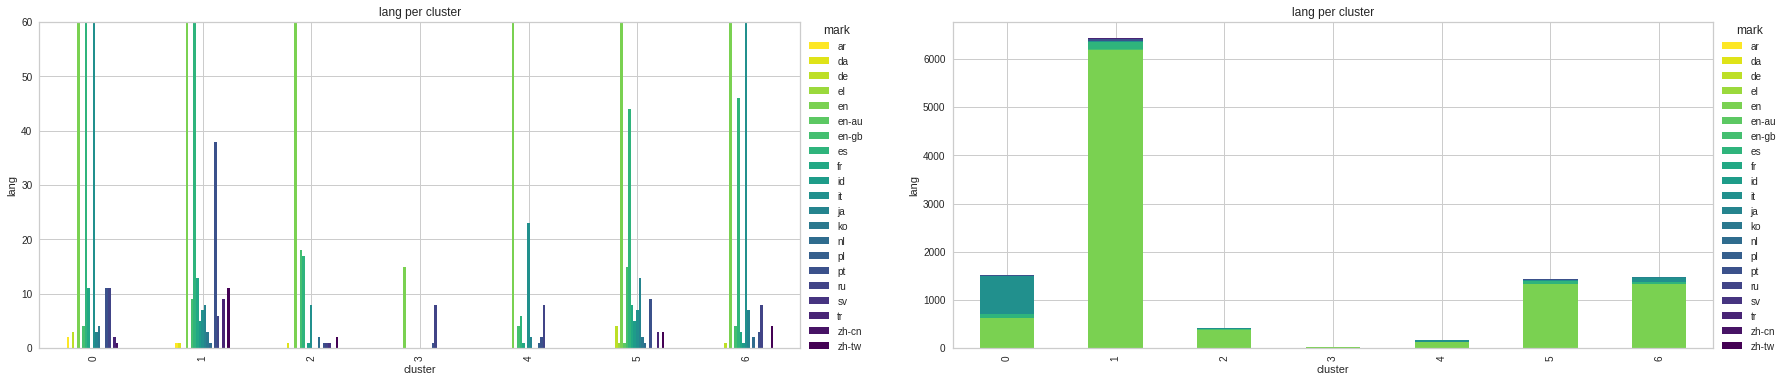

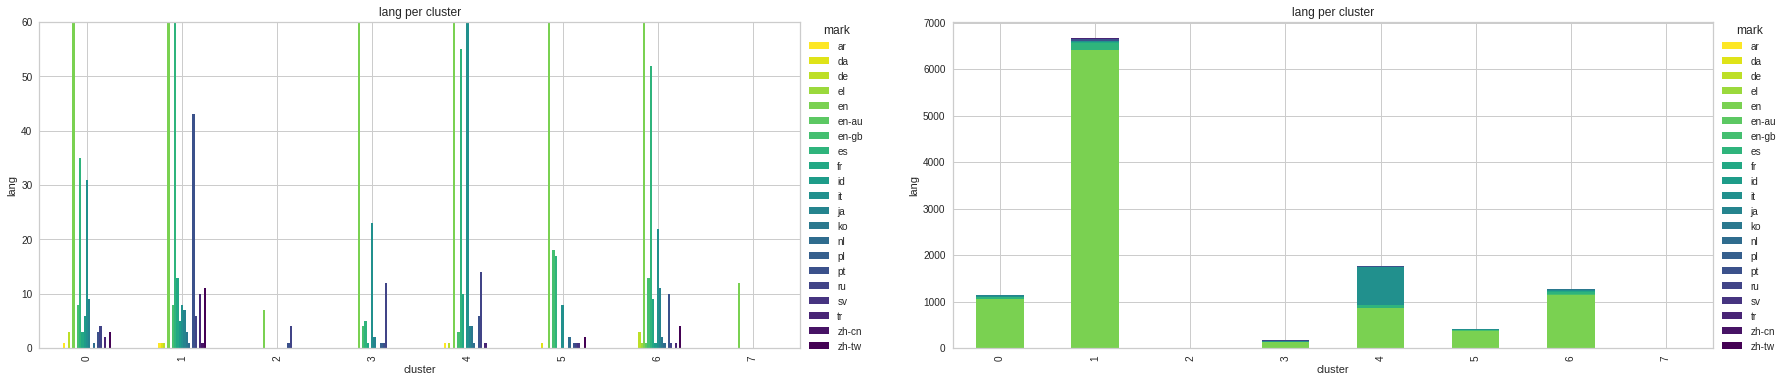

In [ ]:
for i in range(len(kmeans)):
  lang_ct = pd.crosstab(kmeans[i].labels_,users_profile_all['lang'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('lang')
  axs[0].set_ylim(0, 60) 

  ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('lang')

  plt.show()

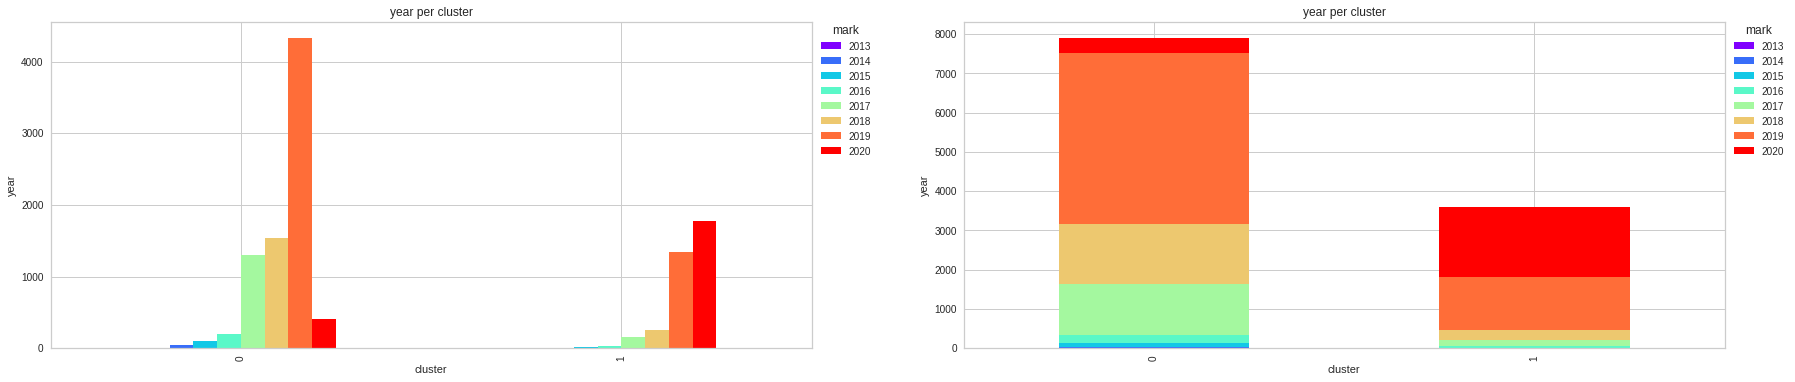

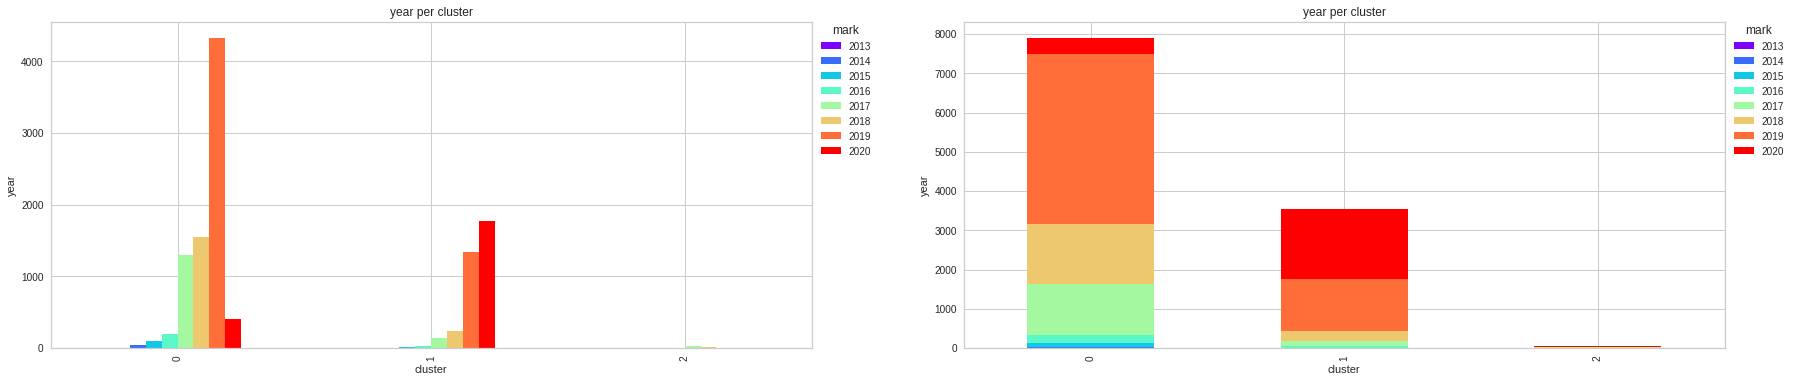

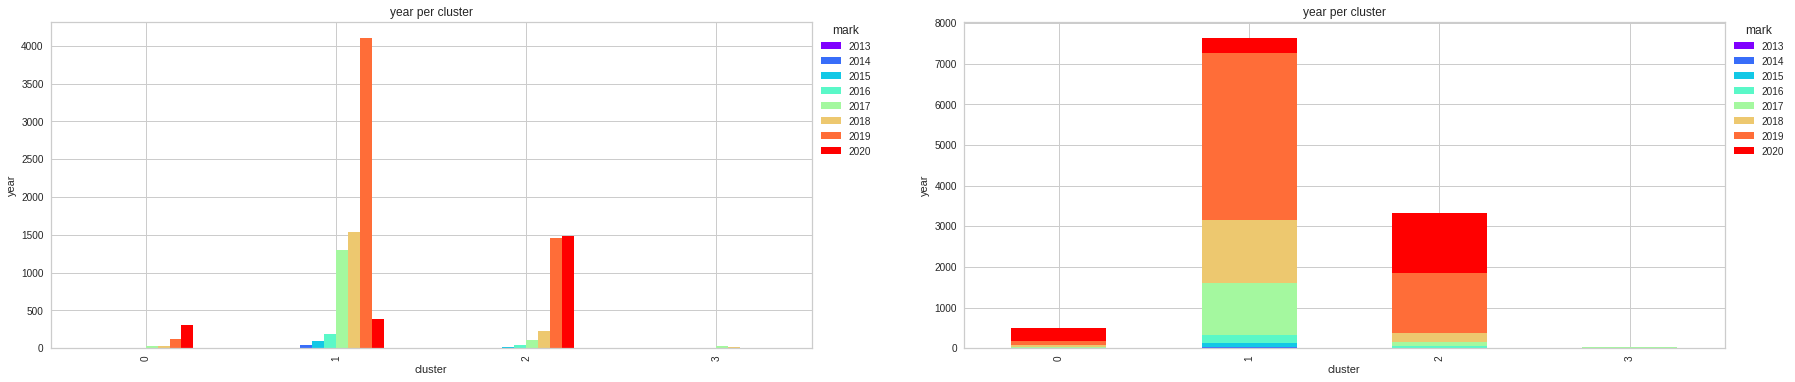

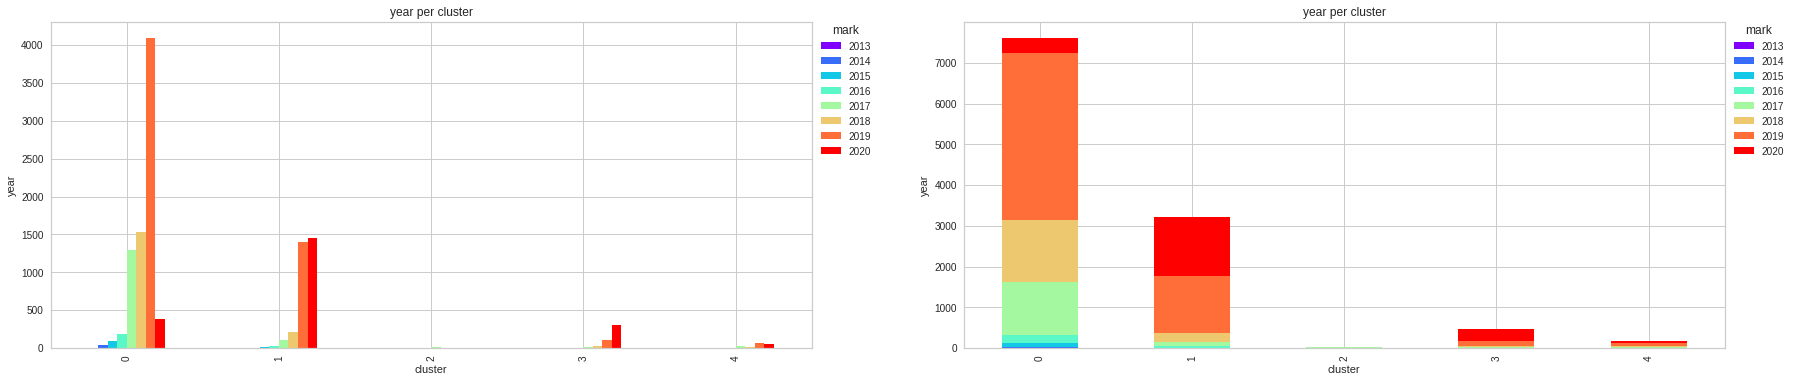

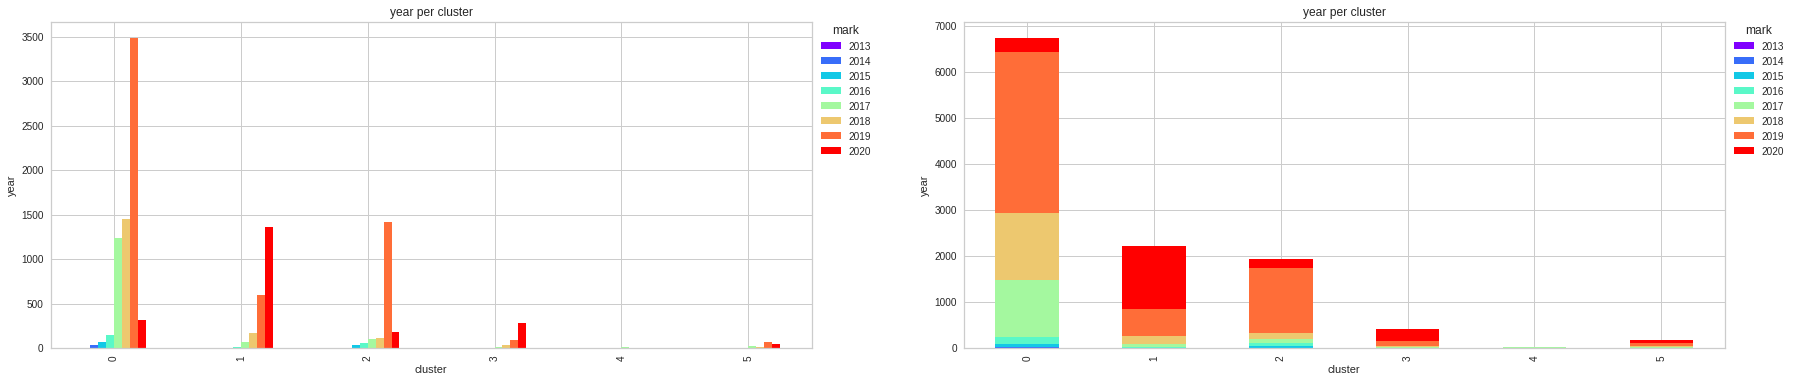

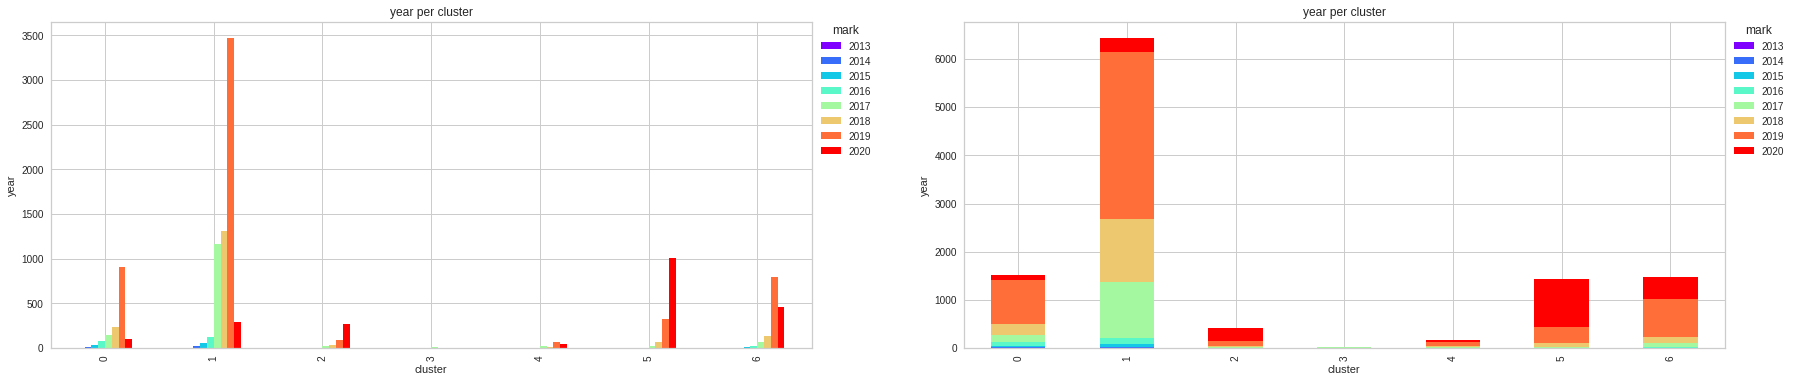

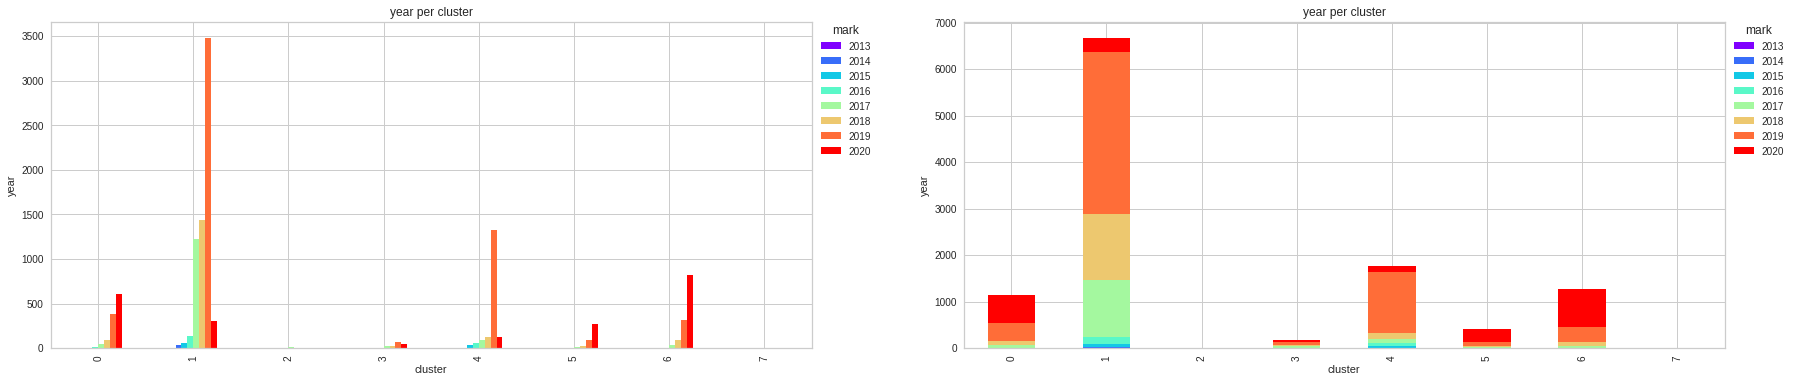

In [ ]:
for i in range(len(kmeans)):
  year_ct = pd.crosstab(kmeans[i].labels_,users_profile_all['most_freq_year'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('year')

  ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('year')

  plt.show()

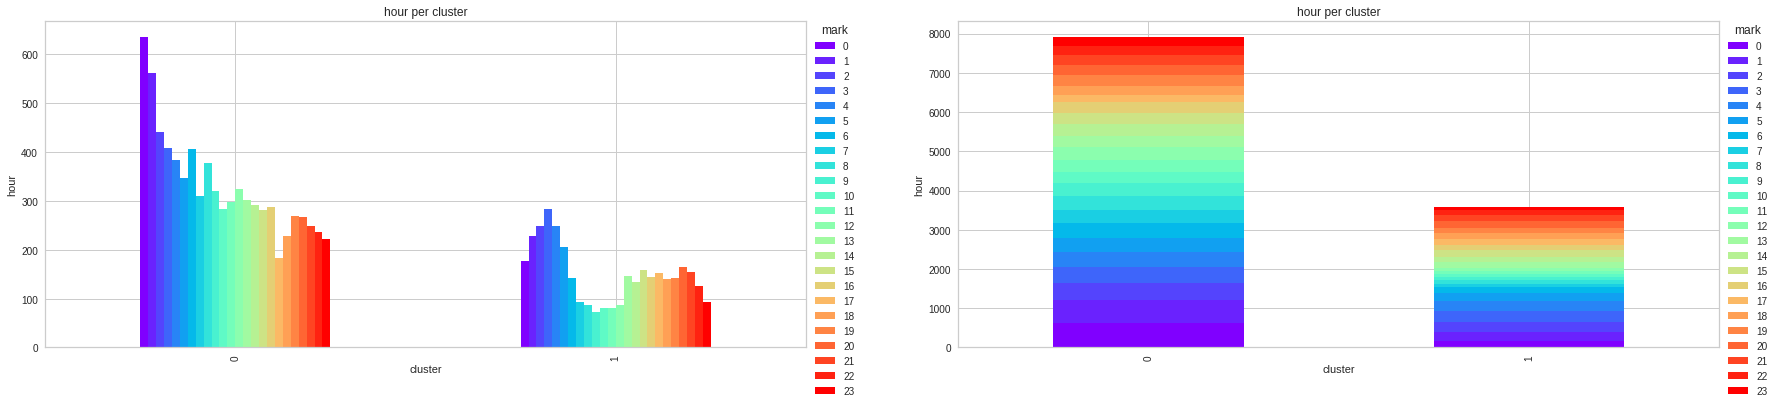

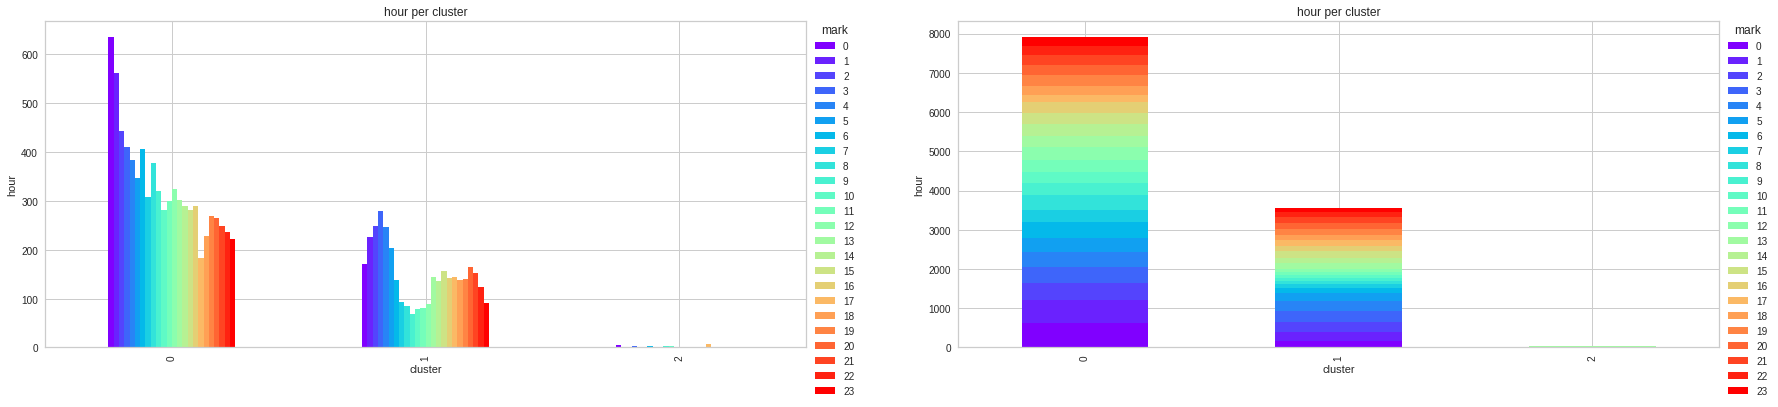

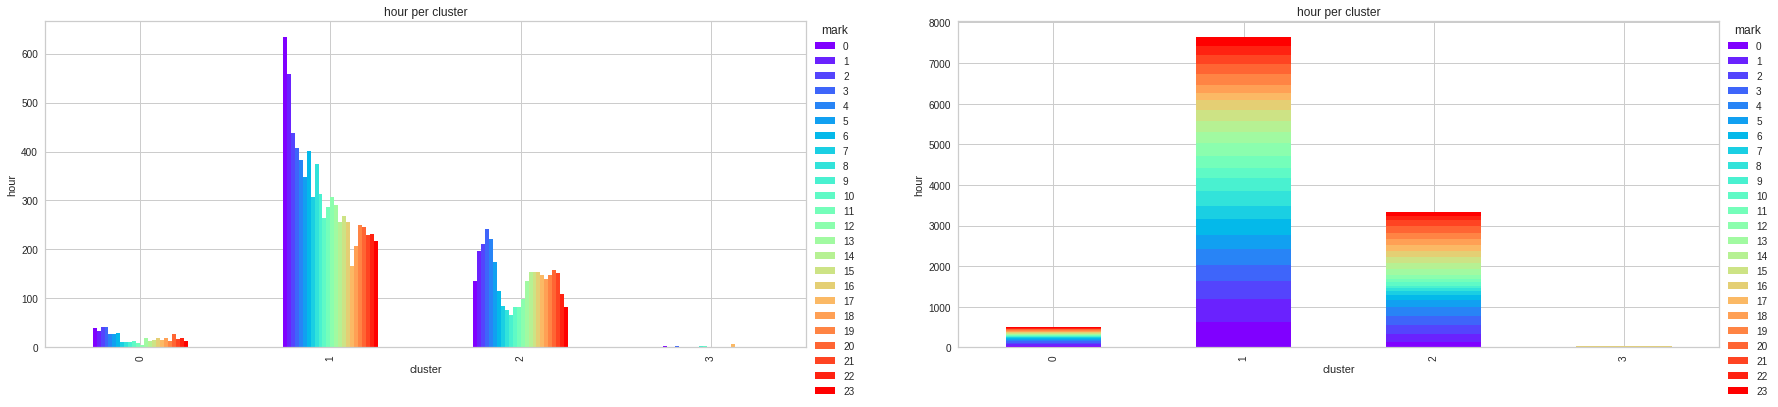

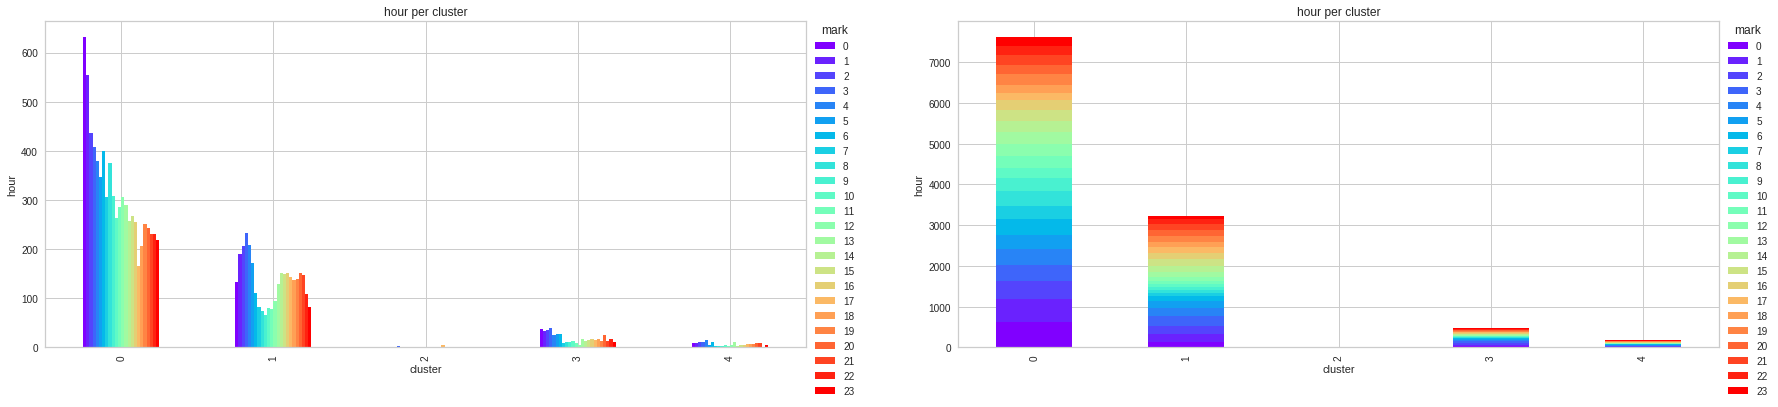

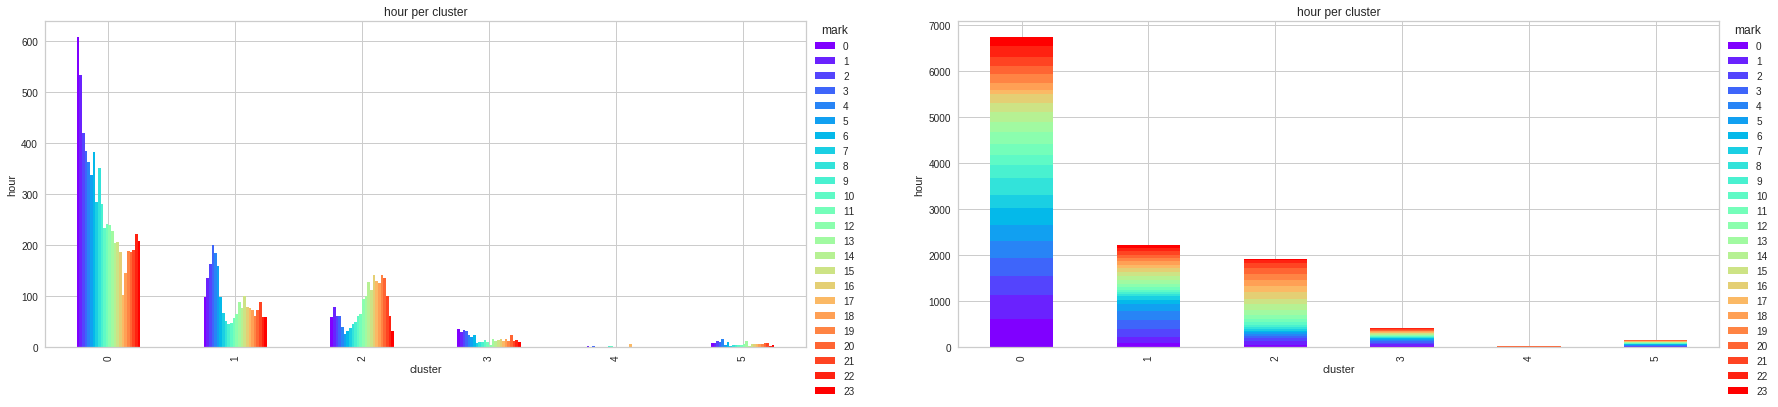

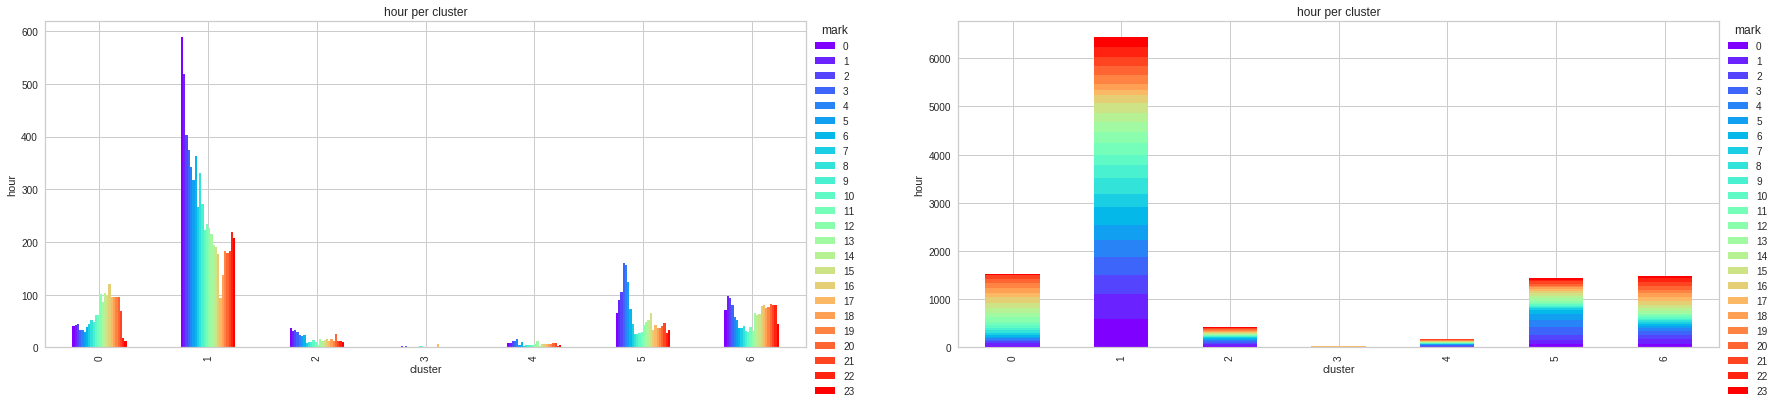

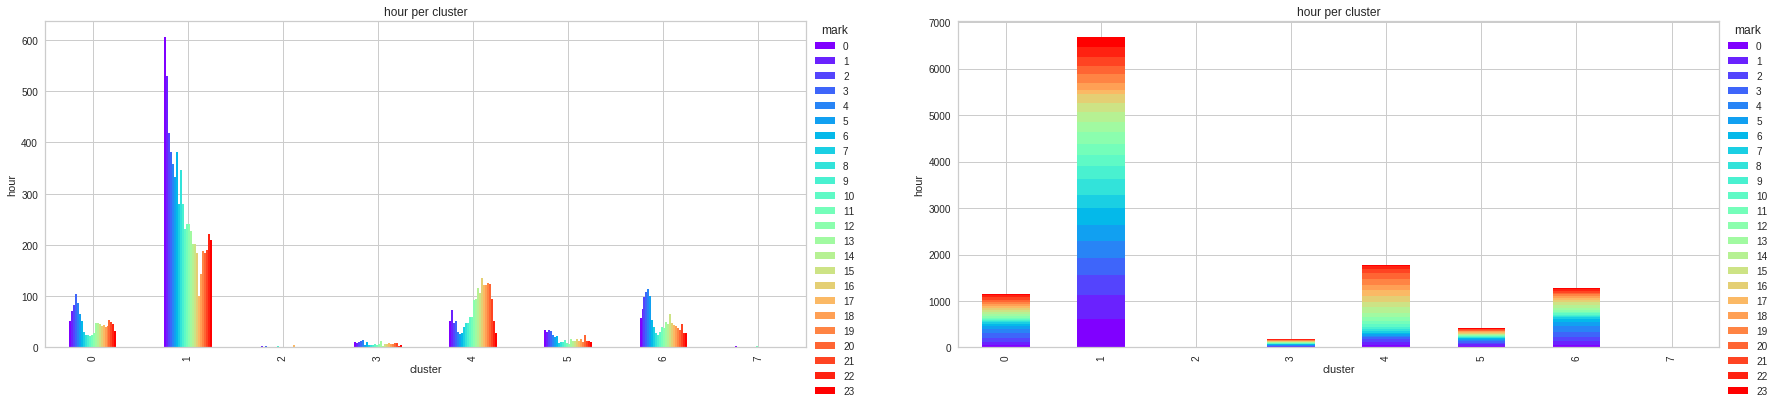

In [ ]:
for i in range(len(kmeans)):
  hour_ct = pd.crosstab(kmeans[i].labels_,users_profile_all['most_freq_hour'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('hour')

  ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('hour')

  plt.show()

## Clusters characterization with respect to numerical features

In [ ]:
cols = []
for i in range(len(kmeans)):
  s = 'label_K='+str(i+2)
  cols.append(s)

In [ ]:
for i in range(len(kmeans)):
  users_profile_all[cols[i]]=kmeans[i].labels_

In [ ]:
users_profile_all.head()

user_id                  name lang  bot      user_created_at  \
0   678033          Heather Gold   en    0  2012-01-24 01:57:38   
1   722623          Buzz Jackson   en    0  2012-01-31 00:54:34   
2   755116                    呉⚛   en    0  2012-02-08 05:25:49   
3   755746  Sarah Friedlander G.   en    0  2012-02-09 05:21:24   
4   785080                   W H   en    0  2012-02-23 01:08:16   

   statuses_count  retweet_count  reply_count  favorite_count  num_hashtags  \
0        6237.625     138813.625          0.0        1031.125         297.5   
1        6237.625     138813.625          0.0         969.000         297.5   
2        6237.625      92396.000          0.0         391.000          77.0   
3        6237.625     138813.625          0.0         209.000         297.5   
4        6237.625     138486.000          0.0        1031.125         185.0   

   ...  avg_textlen  days_on_tw  activity_richness  label_K=2  label_K=3  \
0  ...   109.637321        3900           0.608718          1          1   
1  ...    85.026719        3893           0.519137          1          1   
2  ...    80.780317        3885           0.551866          1          1   
3  ...    84.281111        3884           0.519310          1          1   
4  ...    95.166473        3870           0.887855          1          1   

   label_K=4  label_K=5  label_K=6  label_K=7  label_K=8  
0          2          1          1          6          6  
1          0          3          1          6          0  
2          2          1          1          6          0  
3          2          1          1          6          0  
4          2          1          1          6          0  

[5 rows x 40 columns]

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).mean()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0              119.675752    5624.873689      112.308679     24.143886   
1             4802.244397  100945.649046      565.021123    194.592010   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=2                                                      
0            9.997094        2624.173699           63.906139   
1          176.334911      112410.503898          557.172606   

           std_retweet_count  std_favorite_count  popularity  tweet_richness  \
label_K=2                                                                      
0                 274.619316            9.384655   74.363481        0.437556   
1                4874.627936           31.055466  903.266057        1.149177   

           retcount_entropy  avg_textlen   days_on_tw  activity_richness  
label_K=2                                                                 
0                  0.492798    68.709223  1659.205912           0.153487  
1                  2.329789    73.804822  2176.320991           1.294792

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0              118.426810    5675.222382      113.024413     24.072764   
1             4860.028881  100374.535151      558.346295    196.009862   
2              262.930233  138813.625000      984.165698     90.662791   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=3                                                      
0            9.883148        2660.734715           69.110536   
1          177.906453      111951.185686          436.781910   
2           67.604651      143589.651163         9535.511628   

           std_retweet_count  std_favorite_count    popularity  \
label_K=3                                                        
0                 277.269804            9.552539     74.722652   
1                4458.937619           10.628402    646.831948   
2               38695.643588         1686.094420  22001.904436   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=3                                                               
0                0.437662          0.490711    68.712198  1659.293962   
1                1.143617          2.357301    73.070957  2172.885602   
2                1.588606          0.443220   133.826575  2443.651163   

           activity_richness  
label_K=3                     
0                   0.153063  
1                   1.310081  
2                   0.110831

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0             4603.368461  138813.625000      559.448189    213.379276   
1              100.634907    5515.643000       88.423620     20.141839   
2             4550.128271   87340.676241      578.719023    188.408120   
3              262.750000  138813.625000     1005.446875     89.662500   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=4                                                      
0          159.434608      435515.201207          474.784708   
1            7.727439        2724.896809           59.851033   
2          171.841805       54705.131429          428.166917   
3           70.875000      134282.775000         9750.025000   

           std_retweet_count  std_favorite_count    popularity  \
label_K=4                                                        
0               19174.531487           17.490136   2936.099119   
1                 285.120946            9.492469     76.970980   
2                1940.720623           10.105602    264.110344   
3               38021.927075         1774.175312  22681.617948   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=4                                                               
0                1.104981          2.335202    69.601326  2024.160966   
1                0.437986          0.421094    68.058926  1644.784462   
2                1.091233          2.368317    74.776964  2187.214737   
3                1.629452          0.366372   135.132893  2427.500000   

           activity_richness  
label_K=4                     
0                   1.381148  
1                   0.129066  
2                   1.259574  
3                   0.113432

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0               99.937196    5387.425285       86.100637     20.058210   
1             4545.570686   88000.153903      559.159063    188.771726   
2              112.875000  138813.625000      988.328125     61.541667   
3             4689.662846  138813.625000      549.775053    214.583156   
4             3377.034483   81062.443966     1031.125000    154.798851   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=5                                                      
0            7.614910        2679.160782           39.676729   
1          171.637492       55574.211670          102.795469   
2           47.583333      146580.250000         9583.375000   
3          160.008529      444409.362473          137.040512   
4          145.471264       75476.643678         9077.402299   

           std_retweet_count  std_favorite_count    popularity  \
label_K=5                                                        
0                 282.425557            7.930982     76.352094   
1                1976.355619            2.963478    267.992359   
2               50169.085236         2081.494841  33265.547243   
3               19370.547065            3.169630   2975.858441   
4                5029.237415          370.248557   1114.622194   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=5                                                               
0                0.436151          0.419555    68.017438  1643.512928   
1                1.101441          2.370588    74.762432  2190.735258   
2                1.498621          0.000000   138.740448  2438.875000   
3                1.101918          2.385955    68.461117  2010.985075   
4                0.959173          1.815820    83.113071  2123.333333   

           activity_richness  
label_K=5                     
0                   0.128643  
1                   1.249015  
2                   0.054871  
3                   1.415245  
4                   1.128528

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0               81.845756    5008.952965       40.654485     10.050630   
1             5191.284424  121519.269695      626.411005    215.783070   
2             1861.416580   14395.818111      429.174299    116.164245   
3             4669.691452  138813.625000      540.624122    217.051522   
4              112.875000  138813.625000      988.328125     61.541667   
5             3309.726471   81335.382353     1031.125000    154.941176   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=6                                                      
0            2.822832        2597.427576           31.991549   
1          170.152144       82668.059594          113.133634   
2          115.037364        5429.603529           98.170213   
3          161.981265      461169.407494          145.866511   
4           47.583333      146580.250000         9583.375000   
5          144.823529       76599.876471         9173.005882   

           std_retweet_count  std_favorite_count    popularity  \
label_K=6                                                        
0                 285.206560            7.351307     75.929432   
1                2855.822225            3.078976    386.836831   
2                 363.973919            7.273455     69.488284   
3               20275.745940            3.301254   3134.635947   
4               50169.085236         2081.494841  33265.547243   
5                5123.566315          376.789446   1137.875213   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=6                                                               
0                0.420763          0.387970    64.954201  1578.944700   
1                1.270034          2.733089    68.517982  2194.514673   
2                0.659144          1.171889    89.475806  2161.034250   
3                1.101401          2.401289    68.431927  2007.402810   
4                1.498621          0.000000   138.740448  2438.875000   
5                0.964300          1.855055    83.268412  2122.235294   

           activity_richness  
label_K=6                     
0                   0.073290  
1                   1.281662  
2                   0.897309  
3                   1.435105  
4                   0.054871  
5                   1.114410

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0              293.619266   13518.902769      562.177343     95.422018   
1               79.302704    4028.343478       13.699410      9.921012   
2             4671.628860  138813.625000      537.967340    219.503563   
3              112.875000  138813.625000      988.328125     61.541667   
4             3360.499277   80728.622110     1031.125000    153.973988   
5             5183.812544  129740.134233      713.585366    176.986760   
6             4881.025842   66410.486953      350.064646    206.094949   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=7                                                      
0           44.188073        6160.376147          207.591088   
1            2.898976        2035.042055            5.339385   
2          163.256532      463845.817102          146.349169   
3           47.583333      146580.250000         9583.375000   
4          145.676301       75578.832370         9099.791908   
5          137.880836       96107.913589          128.888502   
6          224.569697       35185.141414           70.855892   

           std_retweet_count  std_favorite_count    popularity  \
label_K=7                                                        
0                 633.754386           37.378176    171.768971   
1                 214.468712            0.850119     53.504972   
2               20387.088613            3.300537   3144.468771   
3               50169.085236         2081.494841  33265.547243   
4                5045.424292          371.887202   1119.061495   
5                3459.676580            3.480029    511.145263   
6                1151.439618            1.782604    119.193214   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=7                                                               
0                0.534834          1.081519    88.628705  2094.565531   
1                0.406990          0.382013    64.516687  1561.925822   
2                1.109324          2.413246    68.764276  2024.950119   
3                1.498621          0.000000   138.740448  2438.875000   
4                0.959030          1.826316    83.268229  2128.271676   
5                0.909959          2.862619    58.330984  1935.991638   
6                1.466698          1.830110    85.943634  2446.387879   

           activity_richness  
label_K=7                     
0                   0.537682  
1                   0.072930  
2                   1.423892  
3                   0.054871  
4                   1.118316  
5                   1.441999  
6                   1.152803

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0             4779.824090  118110.904896      539.455481    224.681109   
1               75.773384    4572.879415       37.383194      9.903248   
2               35.250000  138813.625000     1031.125000     11.750000   
3             3090.323446   84841.730226     1031.125000    151.774011   
4             1644.243099    9240.232958      444.981831     99.716056   
5             4696.076322  138813.625000      547.806490    216.800481   
6             5277.268652  116719.730273      651.243262    209.865625   
7               30.583333    2951.750000        5.083333    152.000000   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=8                                                      
0          172.483536       82514.564991          109.083189   
1            2.851691        2303.257408           29.611194   
2            5.333333      151506.916667        10000.000000   
3          139.632768       80766.610169         9317.468927   
4          104.325634        3362.369577          113.495211   
5          161.004808      465585.024038          149.576923   
6          169.147656       76687.788281          117.633594   
7           82.250000        1133.083333            5.000000   

           std_retweet_count  std_favorite_count    popularity  \
label_K=8                                                        
0                3025.140257            3.186668    392.681775   
1                 264.059988            6.713672     71.329257   
2               63217.001641         2474.295690  50518.039082   
3                6826.752995          473.185149   1968.468328   
4                 261.755761           10.416745     64.463390   
5               20714.275029            3.376041   3268.962832   
6                2637.799817            3.088219    369.892643   
7                 250.950281            0.799348     83.926738   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=8                                                               
0                1.204432          0.443136    73.904372  2321.788562   
1                0.420208          0.385963    64.789443  1574.922029   
2                1.350714          0.000000   153.698857  2437.333333   
3                1.003006          1.735438    86.113485  2154.932203   
4                0.578069          1.211265    89.728025  2132.173521   
5                1.103432          2.423334    68.332766  1995.019231   
6                1.078851          4.460389    66.607341  2110.746875   
7               27.835424          0.386100    63.573330  1806.916667   

           activity_richness  
label_K=8                     
0                   1.053700  
1                   0.071972  
2                   0.007419  
3                   1.044438  
4                   0.877964  
5                   1.454343  
6                   1.422204  
7                   0.019627

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).std()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0              390.382951   21221.311739      280.279645     46.407530   
1             2087.580448   56415.971602      401.480668    114.121482   

            num_urls  max_retweet_count  max_favorite_count  \
label_K=2                                                     
0          32.037977       11452.120836          485.922789   
1          83.926431      148992.765793         2049.212136   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=2                                                                       
0                1000.302535           56.720086   437.026831        0.633019   
1                8833.712058          204.955593  3633.390031        1.729150   

           retcount_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=2                                                                
0                  0.958825    14.235051  429.981958           0.259638  
1                  2.234338    20.450538  621.673665           0.723351

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0              382.950819   21367.164864      281.468083     46.215979   
1             2035.300870   56667.297045      400.467030    113.490018   
2              412.506069       0.000000      215.167444    114.105461   

            num_urls  max_retweet_count  max_favorite_count  \
label_K=3                                                     
0          31.637929       11580.641230          527.983569   
1          82.738526      149635.733995         1766.737570   
2          96.317960       80306.053277         2127.951456   

           std_retweet_count  std_favorite_count    popularity  \
label_K=3                                                        
0                1007.103530           57.053677    437.281991   
1                7568.517171           47.828971   1734.007377   
2               25480.740569          743.582681  20334.476434   

           tweet_richness  retcount_entropy  avg_textlen  days_on_tw  \
label_K=3                                                              
0                0.632988          0.955960    14.240734  430.385638   
1                1.736954          2.232679    19.231087  623.002631   
2                0.781980          1.271947    27.518838  365.363999   

           activity_richness  
label_K=3                     
0                   0.258644  
1                   0.714800  
2                   0.185887

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0             2202.986462       0.000000      378.788703    101.464814   
1              318.940684   21357.589173      244.300298     39.688650   
2             2272.274577   61114.208195      406.531809    113.309567   
3              424.238428       0.000000      162.402722    117.242319   

            num_urls  max_retweet_count  max_favorite_count  \
label_K=4                                                     
0          83.510625      101534.922012         1895.050998   
1          27.047153       12330.044884          465.263891   
2          86.702280       66693.637276         1735.414132   
3          99.046010       59966.168340         1580.980716   

           std_retweet_count  std_favorite_count    popularity  \
label_K=4                                                        
0               11871.162707           91.099988   4000.772124   
1                1029.526349           57.529067    443.778141   
2                2375.347680           40.977270    430.931487   
3               24617.686270          686.566418  20687.508975   

           tweet_richness  retcount_entropy  avg_textlen  days_on_tw  \
label_K=4                                                              
0                0.469636          2.269246    17.799735  644.247578   
1                0.634786          0.830409    13.872346  424.460165   
2                1.803689          2.195654    19.317762  602.129657   
3                0.796015          1.150652    26.624330  356.559701   

           activity_richness  
label_K=4                     
0                   0.869287  
1                   0.217920  
2                   0.678552  
3                   0.192592

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0              318.297795   21031.602195      240.293198     39.660701   
1             2271.972803   60927.283995      404.521950    113.122793   
2              187.074808       0.000000      209.661013    108.192051   
3             2136.390656       0.000000      373.133223    100.855918   
4             2764.519784   63830.512643        0.000000    119.637735   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=5                                                      
0           26.819981       12356.137127          212.107556   
1           86.620081       67652.751392          356.346410   
2           90.734163       64585.257016         2041.037328   
3           82.900697       92491.320303          701.104063   
4          100.339521      108929.538606         1561.476284   

           std_retweet_count  std_favorite_count    popularity  \
label_K=5                                                        
0                1047.313689           45.837391    446.095238   
1                2413.066883            9.246544    435.926333   
2               23666.786225          688.301126  20733.219349   
3               12073.434544           12.360836   4097.403937   
4                8293.940046          379.189229   2173.199156   

           tweet_richness  retcount_entropy  avg_textlen  days_on_tw  \
label_K=5                                                              
0                0.633422          0.826724    13.815893  423.279208   
1                1.829361          2.198944    19.361921  602.595719   
2                0.695590          0.000000    29.293791  391.502270   
3                0.472355          2.267596    15.874600  644.082082   
4                0.657533          2.073920    26.788721  575.461356   

           activity_richness  
label_K=5                     
0                   0.217925  
1                   0.673653  
2                   0.098890  
3                   0.858630  
4                   0.895057

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0              286.903610   20996.627989      165.510655     20.650069   
1             1703.062730   38311.125669      376.759639     99.411840   
2             2493.054950   30964.178514      410.647513     98.141906   
3             2156.289816       0.000000      369.476909    101.296222   
4              187.074808       0.000000      209.661013    108.192051   
5             2761.380402   63668.457856        0.000000    118.858611   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=6                                                      
0           16.226476       12526.981338          174.986062   
1           83.913411       74478.058953          404.643182   
2           99.949752       17741.239522          378.695661   
3           82.208053       77365.682319          733.401336   
4           90.734163       64585.257016         2041.037328   
5          100.818153      109877.306701         1447.619897   

           std_retweet_count  std_favorite_count    popularity  \
label_K=6                                                        
0                1069.780652           43.844043    448.010384   
1                2508.584002            9.721461    489.245424   
2                1536.978435           40.528653    359.270188   
3               12247.226685           12.919557   4253.422599   
4               23666.786225          688.301126  20733.219349   
5                8366.792165          381.195648   2193.271484   

           tweet_richness  retcount_entropy  avg_textlen  days_on_tw  \
label_K=6                                                              
0                0.594447          0.746314    10.175128  378.044654   
1                2.140131          2.286882    18.625717  657.346104   
2                0.767307          1.631507    14.602103  448.067231   
3                0.461687          2.259312    15.236116  648.647623   
4                0.695590          0.000000    29.293791  391.502270   
5                0.662610          2.082081    27.022288  573.202891   

           activity_richness  
label_K=6                     
0                   0.098235  
1                   0.698260  
2                   0.604868  
3                   0.867096  
4                   0.098890  
5                   0.891527

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0              593.882909   29115.782555      423.801091     76.075350   
1              283.369364   19023.745749       56.586715     20.917975   
2             2157.209418       0.000000      370.522497    100.284004   
3              187.074808       0.000000      209.661013    108.192051   
4             2763.901721   63863.288033        0.000000    119.487767   
5             1680.062284   28839.011599      345.258187    102.786555   
6             2040.642155   61090.592140      364.943666    126.287243   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=7                                                      
0           55.808743       19413.155173          462.955320   
1           18.414373       10761.604358           40.481425   
2           82.334803       74348.267646          738.391572   
3           90.734163       64585.257016         2041.037328   
4          100.594219      109237.370535         1537.742317   
5           84.805548       73771.476768          452.014322   
6           50.079277       59995.089415          257.067646   

           std_retweet_count  std_favorite_count    popularity  \
label_K=7                                                        
0                1807.601493           96.483805    656.961828   
1                 937.423098            6.036179    370.443624   
2               12297.758672           13.005732   4283.771574   
3               23666.786225          688.301126  20733.219349   
4                8315.258531          379.671561   2178.716057   
5                2570.908521           10.483168    547.243493   
6                1981.817990            5.771596    276.167743   

           tweet_richness  retcount_entropy  avg_textlen  days_on_tw  \
label_K=7                                                              
0                0.592491          1.592233    16.019860  427.719374   
1                0.560131          0.730692     9.665565  364.842049   
2                0.475000          2.265299    15.264323  652.789636   
3                0.695590          0.000000    29.293791  391.502270   
4                0.659439          2.075300    26.787957  573.422225   
5                0.360513          2.282420    11.376059  561.206852   
6                2.675908          2.086999    14.460165  577.606814   

           activity_richness  
label_K=7                     
0                   0.444124  
1                   0.090112  
2                   0.863787  
3                   0.098890  
4                   0.887431  
5                   0.745942  
6                   0.590819

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0             1987.168083   41583.064596      385.990912     95.538839   
1              244.716372   19705.428206      157.091963     20.405862   
2                6.903556       0.000000        0.000000      9.016399   
3             2774.620261   63410.511061        0.000000    119.969751   
4             2434.170281   21552.952857      417.673977     88.931730   
5             2151.884463       0.000000      370.451021    101.519384   
6             1618.653830   43111.296607      373.902318    101.576690   
7               12.844938    7820.485060       13.747452    152.019287   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=8                                                      
0           84.062104       78175.377601          407.509360   
1           17.178409       11208.934813          167.937438   
2            6.110101          21.064655            0.000000   
3          102.112047      108135.973508         1280.514030   
4           98.595245       11450.089052          419.363288   
5           82.686226       72895.220780          742.701457   
6           84.159902       72750.639116          442.779084   
7          120.207491        2356.951246           13.463756   

           std_retweet_count  std_favorite_count    popularity  \
label_K=8                                                        
0                2944.978920           12.542652    519.789530   
1                1011.240224           41.590576    443.973466   
2                5806.163545          500.002908  13769.907478   
3               11119.222104          520.150384   3970.225290   
4                1179.055525           50.625316    354.710855   
5               13012.131405           13.081476   4588.466868   
6                2443.181468           10.038646    478.320412   
7                 554.938299            2.209164    218.323768   

           tweet_richness  retcount_entropy  avg_textlen  days_on_tw  \
label_K=8                                                              
0                0.612048          0.926753    19.136877  651.615973   
1                0.596594          0.739563     9.942394  375.193023   
2                0.186618          0.000000    18.160359  247.646865   
3                0.706541          2.065689    29.350550  575.238040   
4                0.627990          1.627792    14.273437  417.135243   
5                0.463490          2.242020    15.142582  649.039687   
6                0.543376          1.301587    18.529103  643.148728   
7               10.278849          0.650463     9.780604  118.087378   

           activity_richness  
label_K=8                     
0                   0.571823  
1                   0.091972  
2                   0.003493  
3                   0.898183  
4                   0.605529  
5                   0.874661  
6                   0.756210  
7                   0.007461

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).max()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=2                                                                       
0             245.0           246185.0             10000.0       20616.043432   
1             245.0           500000.0             10000.0      106034.982635   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=2                                                                       
0                 1174.763061  18511.666667       17.033898          5.981757   
1                 3722.299247  69042.400000       41.833333          6.369161   

           avg_textlen  days_on_tw  activity_richness  
label_K=2                                              
0                245.0        3853           2.360635  
1                189.0        3900           4.148438

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                1576.000     138813.625        1031.125         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=3                                                                       
0             245.0           246185.0             10000.0       20616.043432   
1             245.0           500000.0             10000.0       63204.336440   
2             245.0           500000.0             10000.0      106034.982635   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=3                                                                       
0                 1174.763061  18511.666667       17.033898          5.981757   
1                  807.086990  26717.125571       41.833333          6.369161   
2                 3722.299247  69042.400000        3.043548          5.154424   

           avg_textlen  days_on_tw  activity_richness  
label_K=3                                              
0           245.000000        3853           2.360635  
1           178.536697        3900           4.148438  
2           189.000000        3068           0.690593

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                6237.625     138813.625        1031.125         297.5   
3                1576.000     138813.625        1031.125         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=4                                                                       
0             245.0           500000.0             10000.0       95097.011295   
1             245.0           246185.0             10000.0       17162.545678   
2             245.0           301236.0             10000.0       17240.710889   
3             245.0           401304.0             10000.0      106034.982635   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=4                                                                       
0                  807.086990  29482.488281        3.325935          6.362118   
1                 1174.763061  18511.666667       17.033898          5.981757   
2                  579.453538   5119.340568       41.833333          6.369161   
3                 3722.299247  69042.400000        3.043548          5.154424   

           avg_textlen  days_on_tw  activity_richness  
label_K=4                                              
0           166.371681        3893           4.105727  
1           245.000000        3853           2.360635  
2           178.536697        3900           4.148438  
3           189.000000        3068           0.690593

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                 656.000     138813.625        1031.125         297.5   
3                6237.625     138813.625        1031.125         297.5   
4                6237.625     138813.625        1031.125         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=5                                                                       
0             245.0           246185.0              4824.0       20616.043432   
1             245.0           301236.0              5000.0       18420.926936   
2             245.0           401304.0             10000.0      106034.982635   
3             245.0           500000.0             10000.0       95097.011295   
4             245.0           500000.0             10000.0       34838.636844   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=5                                                                       
0                  598.158006  18511.666667       17.033898          5.981757   
1                  172.139404   5119.340568       41.833333          6.369161   
2                 3722.299247  69042.400000        3.043548          0.000000   
3                  171.047654  29482.488281        3.325935          6.362118   
4                 1918.615372  10037.161290        3.035286          6.313700   

           avg_textlen  days_on_tw  activity_richness  
label_K=5                                              
0           245.000000        3853           2.360635  
1           178.536697        3900           4.148438  
2           189.000000        3068           0.341629  
3           133.949791        3893           4.105727  
4           165.230769        3308           4.101197

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                6237.625     138813.625        1031.125         297.5   
3                6237.625     138813.625        1031.125         297.5   
4                 656.000     138813.625        1031.125         297.5   
5                6237.625     138813.625        1031.125         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=6                                                                       
0             245.0           246185.0              3709.0       20616.043432   
1             245.0           353875.0              5204.0       15824.508204   
2             245.0           196393.0              5000.0       19757.275736   
3             245.0           500000.0             10000.0       95097.011295   
4             245.0           401304.0             10000.0      106034.982635   
5             245.0           500000.0             10000.0       34838.636844   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=6                                                                       
0                  423.486605  18511.666667       17.033898          5.981757   
1                  172.139404   5119.340568       41.833333          6.369161   
2                  598.158006   8539.625000       10.440860          6.211166   
3                  171.047654  29482.488281        2.566038          6.362118   
4                 3722.299247  69042.400000        3.043548          0.000000   
5                 1918.615372  10037.161290        3.035286          6.313700   

           avg_textlen  days_on_tw  activity_richness  
label_K=6                                              
0           119.000000        3226           1.546701  
1           140.946849        3900           4.148438  
2           245.000000        3853           3.847423  
3           118.519065        3463           4.105727  
4           189.000000        3068           0.341629  
5           165.230769        3308           4.101197

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625         890.000         297.5   
2                6237.625     138813.625        1031.125         297.5   
3                 656.000     138813.625        1031.125         297.5   
4                6237.625     138813.625        1031.125         297.5   
5                6237.625     138813.625        1031.125         297.5   
6                6237.625     138813.625        1031.125         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=7                                                                       
0             245.0           242743.0              4824.0       19757.275736   
1             245.0           246185.0               883.0       20616.043432   
2             245.0           500000.0             10000.0       95097.011295   
3             245.0           401304.0             10000.0      106034.982635   
4             245.0           500000.0             10000.0       34838.636844   
5             245.0           401135.0              5204.0       15853.687932   
6             245.0           301236.0              4428.0       19071.972383   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=7                                                                       
0                  598.158006  18511.666667        4.148760          5.957852   
1                  160.303532  14865.166667        9.276786          5.981757   
2                  171.047654  29482.488281        3.325935          6.362118   
3                 3722.299247  69042.400000        3.043548          0.000000   
4                 1918.615372  10037.161290        3.035286          6.313700   
5                  172.139404   4392.119153        3.008523          6.369161   
6                  123.773716   5119.340568       41.833333          6.313409   

           avg_textlen  days_on_tw  activity_richness  
label_K=7                                              
0           245.000000        3853           2.360635  
1           104.000000        3226           1.546701  
2           118.519065        3463           4.105727  
3           189.000000        3068           0.341629  
4           165.230769        3308           4.101197  
5           103.129645        3823           4.148438  
6           178.536697        3900           3.856695

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                  51.000     138813.625        1031.125          40.0   
3                6237.625     138813.625        1031.125         297.5   
4                6237.625     138813.625        1031.125         297.5   
5                6237.625     138813.625        1031.125         297.5   
6                6237.625     138813.625        1031.125         297.5   
7                  57.000      27275.000          48.000         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=8                                                                       
0             245.0           403588.0              5204.0       19757.275736   
1             245.0           246185.0              3709.0       20616.043432   
2              21.0           151542.0             10000.0       69510.395858   
3             245.0           500000.0             10000.0       49481.354368   
4             245.0           152091.0              5286.0       19644.631511   
5             245.0           500000.0             10000.0      106034.982635   
6             245.0           364443.0              5493.0       15824.508204   
7             245.0             7322.0                47.0        1865.658108   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=8                                                                       
0                  284.172893   5119.340568        4.238321          4.633505   
1                  423.486605  18511.666667       10.440860          4.575395   
2                 3722.299247  69042.400000        1.837838          0.000000   
3                 2418.401650  22333.722222        3.043548          6.313700   
4                  598.158006   8539.625000        4.148760          6.211166   
5                  171.047654  36148.675676        2.566038          6.362118   
6                  172.139404   4346.044126        6.139245          6.369161   
7                    7.720823    759.027778       41.833333          2.118078   

           avg_textlen  days_on_tw  activity_richness  
label_K=8                                              
0           152.552135        3893           3.305235  
1           111.333333        3226           1.546701  
2           189.000000        2868           0.016934  
3           165.230769        3308           4.101197  
4           245.000000        3853           3.778905  
5           118.519065        3463           4.105727  
6           124.599044        3900           4.148438  
7            78.657143        1921           0.034375

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).min()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0                     0.0            0.0             0.0           0.0   
1                    16.0            0.0             0.0           0.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=2                                                                       
0               0.0                0.0                 0.0                0.0   
1               0.0                0.0                 0.0                0.0   

           std_favorite_count  popularity  tweet_richness  retcount_entropy  \
label_K=2                                                                     
0                         0.0         0.0        0.000000               0.0   
1                         0.0         0.0        0.002976               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=2                                              
0             3.000000         890           0.000319  
1            21.107632         896           0.004533

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0                     0.0          0.000             0.0           0.0   
1                    16.0          0.000             0.0           0.0   
2                    24.0     138813.625             4.0           1.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=3                                                                       
0               0.0                0.0                 0.0           0.000000   
1               0.0                0.0                 0.0           0.000000   
2               2.0            24410.0                 1.0        4622.883067   

           std_favorite_count   popularity  tweet_richness  retcount_entropy  \
label_K=3                                                                      
0                    0.000000     0.000000        0.000000               0.0   
1                    0.000000     0.000000        0.002976               0.0   
2                    0.310517  2558.037736        0.273973               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=3                                              
0             3.000000         890           0.000319  
1            21.107632         896           0.010071  
2            67.371429        1247           0.004533

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0                    25.0     138813.625             0.0           0.0   
1                     0.0          0.000             0.0           0.0   
2                    16.0          0.000             0.0           0.0   
3                    24.0     138813.625             4.0           1.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=4                                                                       
0               0.0           145873.0                 0.0        6793.791798   
1               0.0                0.0                 0.0           0.000000   
2               0.0                0.0                 0.0           0.000000   
3               2.0            24410.0                 1.0        4622.883067   

           std_favorite_count   popularity  tweet_richness  retcount_entropy  \
label_K=4                                                                      
0                    0.000000   132.863359        0.084900               0.0   
1                    0.000000     0.000000        0.000000               0.0   
2                    0.000000     0.000000        0.000000               0.0   
3                    0.310517  2558.037736        0.273973               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=4                                              
0            38.092199         908           0.010071  
1             3.000000         890           0.000319  
2            21.107632         896           0.010676  
3            67.371429        1247           0.004533

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0                     0.0          0.000           0.000           0.0   
1                    16.0          0.000           0.000           0.0   
2                    24.0     138813.625           4.000           1.0   
3                    25.0     138813.625           1.000           0.0   
4                    12.0          2.000        1031.125           0.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=5                                                                       
0               0.0                0.0                 0.0           0.000000   
1               0.0                0.0                 0.0           0.000000   
2               2.0            46559.0                 1.0        7861.931082   
3               0.0           145873.0                 1.0        6793.791798   
4               0.0                1.0              3983.0           0.028356   

           std_favorite_count   popularity  tweet_richness  retcount_entropy  \
label_K=5                                                                      
0                    0.000000     0.000000        0.000000               0.0   
1                    0.000000     0.000000        0.000000               0.0   
2                    0.310517  8043.263722        0.731707               0.0   
3                    0.044992   132.863359        0.084900               0.0   
4                   81.791432     1.359475        0.060421               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=5                                              
0             3.000000         890           0.000319  
1            25.117843         896           0.010676  
2            67.371429        1247           0.004533  
3            38.092199         908           0.010071  
4            21.107632         919           0.014314

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0                     0.0          0.000           0.000           0.0   
1                    16.0          0.000           0.000           0.0   
2                     1.0          0.000           0.000           0.0   
3                    25.0     138813.625           1.000           0.0   
4                    24.0     138813.625           4.000           1.0   
5                    12.0          2.000        1031.125           0.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=6                                                                       
0               0.0                0.0                 0.0           0.000000   
1               0.0                0.0                 0.0           0.000000   
2               0.0                0.0                 0.0           0.000000   
3               0.0           145873.0                 1.0        6793.791798   
4               2.0            46559.0                 1.0        7861.931082   
5               0.0                1.0              3983.0           0.028356   

           std_favorite_count   popularity  tweet_richness  retcount_entropy  \
label_K=6                                                                      
0                    0.000000     0.000000        0.000000               0.0   
1                    0.000000     0.000000        0.005892               0.0   
2                    0.000000     0.000000        0.000000               0.0   
3                    0.044992   132.863359        0.084900               0.0   
4                    0.310517  8043.263722        0.731707               0.0   
5                   87.114021     1.473927        0.060421               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=6                                              
0             3.000000         890           0.000319  
1            25.117843         896           0.010676  
2            41.328304         937           0.000334  
3            38.092199         908           0.010071  
4            67.371429        1247           0.004533  
5            21.107632         919           0.014314

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0                     1.0          0.000           0.000           0.0   
1                     0.0          0.000           0.000           0.0   
2                    25.0     138813.625           1.000           0.0   
3                    24.0     138813.625           4.000           1.0   
4                    12.0          2.000        1031.125           0.0   
5                    68.0          0.000           0.000           0.0   
6                    16.0          0.000           0.000           0.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=7                                                                       
0               0.0                0.0                 0.0           0.000000   
1               0.0                0.0                 0.0           0.000000   
2               0.0           145873.0                 1.0        6793.791798   
3               2.0            46559.0                 1.0        7861.931082   
4               0.0                1.0              3983.0           0.028356   
5               0.0                0.0                 0.0           0.000000   
6               0.0                0.0                 0.0           0.000000   

           std_favorite_count   popularity  tweet_richness  retcount_entropy  \
label_K=7                                                                      
0                    0.000000     0.000000        0.000000               0.0   
1                    0.000000     0.000000        0.000000               0.0   
2                    0.044992   132.863359        0.084900               0.0   
3                    0.310517  8043.263722        0.731707               0.0   
4                   81.791432     1.359475        0.060421               0.0   
5                    0.000000     0.001071        0.002976               0.0   
6                    0.000000     0.000000        0.103273               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=7                                              
0            48.500000         937           0.000334  
1             3.000000         890           0.000319  
2            38.092199         908           0.010071  
3            67.371429        1247           0.004533  
4            21.107632         919           0.014314  
5            25.117843         896           0.108654  
6            41.475235         956           0.010676

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0                    48.0          7.000           0.000           0.0   
1                     0.0          0.000           0.000           0.0   
2                    28.0     138813.625        1031.125           7.0   
3                    12.0          2.000        1031.125           0.0   
4                     1.0          0.000           0.000           0.0   
5                    25.0     138813.625           1.000           0.0   
6                    68.0          0.000           0.000           0.0   
7                    16.0          0.000           0.000           2.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=8                                                                       
0               1.0                1.0                 0.0           0.043402   
1               0.0                0.0                 0.0           0.000000   
2               2.0           151492.0             10000.0       50809.282248   
3               0.0                1.0              4892.0           0.028356   
4               0.0                0.0                 0.0           0.000000   
5               0.0           145873.0                 1.0        7415.045544   
6               0.0                0.0                 0.0           0.000000   
7               0.0                0.0                 0.0           0.000000   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=8                                                                       
0                    0.000000      0.011593        0.112621               0.0   
1                    0.000000      0.000000        0.000000               0.0   
2                 1621.100454  23376.541667        1.117647               0.0   
3                   92.907264      1.534547        0.060421               0.0   
4                    0.000000      0.000000        0.000000               0.0   
5                    0.088165    132.863359        0.084900               0.0   
6                    0.000000      0.001071        0.005892               0.0   
7                    0.000000      0.000000       15.409091               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=8                                              
0            29.320513         965           0.052429  
1             3.000000         890           0.000319  
2           124.083333        2100           0.004533  
3            21.107632         919           0.013599  
4            41.328304         937           0.000334  
5            38.092199         908           0.010071  
6            25.117843         896           0.095500  
7            53.272727        1686           0.010676